In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

In [2]:
# import matplotlib.font_manager as fm

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# sns.set(font="Malgun Gothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')
# plt.rc('font', family='NanumMyeongjo') # For Windows

##### 유동성데이터 전처리

In [4]:
cols = pd.read_excel('data/FISIS_유동성데이터_201703-202209.xls').iloc[0].copy()
liquidity = pd.read_excel('data/FISIS_유동성데이터_201703-202209.xls')
liquidity.columns = cols
liquidity = liquidity.iloc[1:].reset_index(drop = True)
df = liquidity.melt(id_vars = liquidity.columns[:7], var_name="연월", value_name='백만원')
df = df.drop(['회사코드', '보고서명', '보고서코드', 'factor_id', '단위'], axis = 1)
df.head(10)
# 전처리
업무용고정자산비율 = df[df['항목'] == '업무용고정자산비율'].reset_index(drop = True).rename(columns={'백만원':'%'})
업무용고정자산비율_업무용고정자산 = df[df['항목'] == '업무용고정자산비율_업무용고정자산'].reset_index(drop = True)
업무용고정자산비율_자기자본 = df[df['항목'] == '업무용고정자산비율_자기자본'].reset_index(drop = True)
유동성커버리지비율 = df[df['항목'] == '유동성커버리지비율'].reset_index(drop = True).rename(columns={'백만원':'%'})
총고유동성자산 = df[df['항목'] == '유동성커버리지비율_총 고유동성자산'].reset_index(drop = True)
순현금유출액 = df[df['항목'] == '유동성커버리지비율_순현금유출액'].reset_index(drop = True)
순안정자금조달비율 = df[df['항목'] == '순안정자금조달비율'].reset_index(drop = True).rename(columns={'백만원':'%'})
순안정자금조달비율_안정자금가용금액 = df[df['항목'] == '순안정자금조달비율_안정자금가용금액'].reset_index(drop = True)
순안정자금조달비율_안정자금조달필요금액 = df[df['항목'] == '순안정자금조달비율_안정자금가용금액'].reset_index(drop = True)

In [5]:
profitability = pd.read_excel('data/FISIS_수익성데이터_201703-202209.xls')
colss = profitability.iloc[0].copy()
profitability.columns = colss
profitability = profitability.iloc[1:].reset_index(drop = True)
df_profit = profitability.melt(id_vars = profitability.columns[:7], var_name="연월", value_name='%')
df_profit = df_profit.drop(['회사코드', '보고서명', '보고서코드', 'factor_id', '단위'], axis = 1)
# 전처리
총자산순이익률_ROA = df_profit[df_profit['항목'] == '총자산순이익률(ROA)']
자기자본순이익률_ROE = df_profit[df_profit['항목'] == '자기자본순이익률(ROE)']
명목순이자마진_NIM = df_profit[df_profit['항목'] == '명목순이자마진(NIM)']
원화순이자마진 = df_profit[df_profit['항목'] == '원화순이자마진']

##### 수익성데이터 전처리

In [6]:
총자산순이익률_ROA

,회사명,항목,연월,%
0,주식회사 카카오뱅크,총자산순이익률(ROA),2017년03월,NaN
4,주식회사 카카오뱅크,총자산순이익률(ROA),2017년06월,NaN
8,주식회사 카카오뱅크,총자산순이익률(ROA),2017년09월,NaN
12,주식회사 카카오뱅크,총자산순이익률(ROA),2017년12월,-5.57
16,주식회사 카카오뱅크,총자산순이익률(ROA),2018년03월,NaN
20,주식회사 카카오뱅크,총자산순이익률(ROA),2018년06월,NaN
24,주식회사 카카오뱅크,총자산순이익률(ROA),2018년09월,NaN
28,주식회사 카카오뱅크,총자산순이익률(ROA),2018년12월,-0.23
32,주식회사 카카오뱅크,총자산순이익률(ROA),2019년03월,NaN
36,주식회사 카카오뱅크,총자산순이익률(ROA),2019년06월,NaN


##### 연도별 NSFR 구하기

In [7]:
display(유동성커버리지비율)
display(총고유동성자산)
순현금유출액

,회사명,항목,연월,%
0,주식회사 카카오뱅크,유동성커버리지비율,2017년03월,NaN
1,주식회사 카카오뱅크,유동성커버리지비율,2017년06월,NaN
2,주식회사 카카오뱅크,유동성커버리지비율,2017년09월,250.33
3,주식회사 카카오뱅크,유동성커버리지비율,2017년12월,154.75
4,주식회사 카카오뱅크,유동성커버리지비율,2018년03월,279.51
5,주식회사 카카오뱅크,유동성커버리지비율,2018년06월,520.26
6,주식회사 카카오뱅크,유동성커버리지비율,2018년09월,406.62
7,주식회사 카카오뱅크,유동성커버리지비율,2018년12월,307.77
8,주식회사 카카오뱅크,유동성커버리지비율,2019년03월,467.99
9,주식회사 카카오뱅크,유동성커버리지비율,2019년06월,612.07


,회사명,항목,연월,백만원
0,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2017년03월,NaN
1,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2017년06월,NaN
2,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2017년09월,265941
3,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2017년12월,564700
4,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2018년03월,780642
5,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2018년06월,1363156
6,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2018년09월,1425908
7,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2018년12월,1655810
8,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2019년03월,2438682
9,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2019년06월,4165158


,회사명,항목,연월,백만원
0,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2017년03월,NaN
1,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2017년06월,NaN
2,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2017년09월,106235
3,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2017년12월,364907
4,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2018년03월,279287
5,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2018년06월,262014
6,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2018년09월,350674
7,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2018년12월,537997
8,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2019년03월,521097
9,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2019년06월,680501


In [8]:
순현금유출_2018 = 순현금유출액[순현금유출액['연월'].str[:4] == '2018']['백만원'].sum()
순현금유출_2019 = 순현금유출액[순현금유출액['연월'].str[:4] == '2019']['백만원'].sum()
순현금유출_2020 = 순현금유출액[순현금유출액['연월'].str[:4] == '2020']['백만원'].sum()
순현금유출_2021 = 순현금유출액[순현금유출액['연월'].str[:4] == '2021']['백만원'].sum()

In [9]:
총고유동성자산_2018 = 총고유동성자산[총고유동성자산['연월'].str[:4] == '2018']['백만원'].sum()
총고유동성자산_2019 = 총고유동성자산[총고유동성자산['연월'].str[:4] == '2019']['백만원'].sum()
총고유동성자산_2020 = 총고유동성자산[총고유동성자산['연월'].str[:4] == '2020']['백만원'].sum()
총고유동성자산_2021 = 총고유동성자산[총고유동성자산['연월'].str[:4] == '2021']['백만원'].sum()

In [10]:
# 2018
NSFR_2018 = round(총고유동성자산_2018 / 순현금유출_2018  * 100,2)
# 2018
NSFR_2019 = round(총고유동성자산_2019 / 순현금유출_2019  * 100,2)
# 2018
NSFR_2020 = round(총고유동성자산_2020 / 순현금유출_2020  * 100,2)
# 2018
NSFR_2021 = round(총고유동성자산_2021 / 순현금유출_2021  * 100,2)

In [11]:
print(NSFR_2018, NSFR_2019, NSFR_2020, NSFR_2021)

365.43 625.18 427.66 501.37


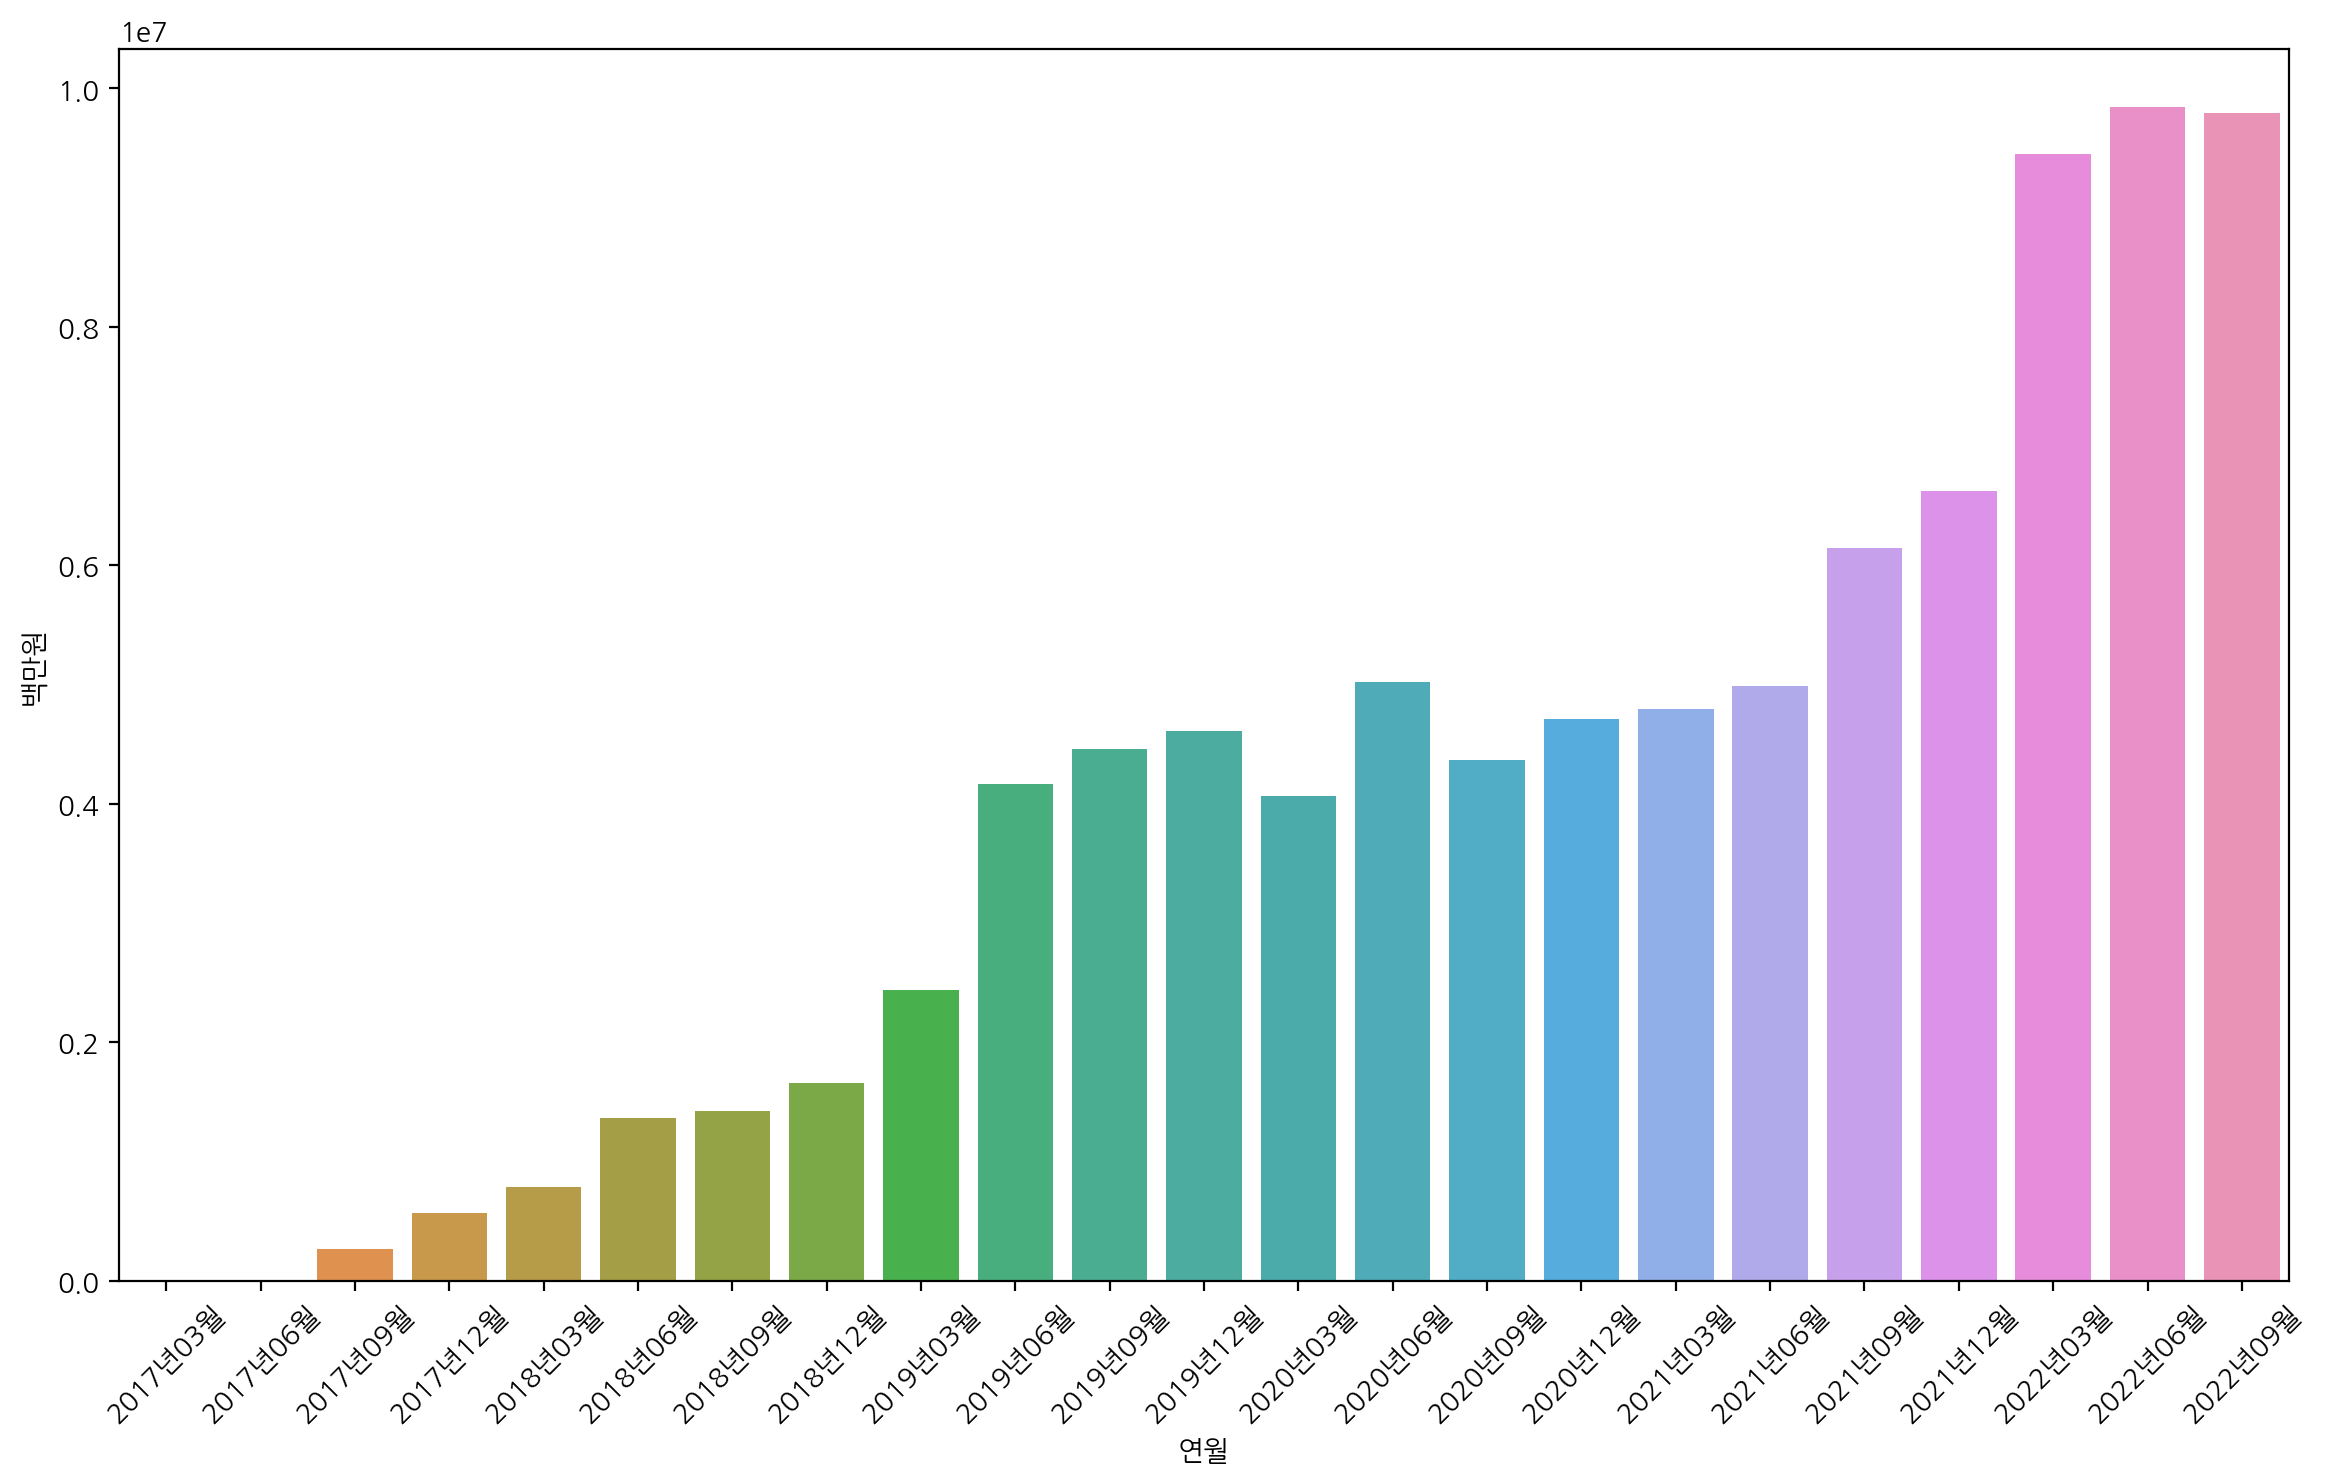

In [12]:
# sns.set_theme()
total_high_liquidity_assets = sns.barplot(data = 총고유동성자산, x = 총고유동성자산['연월'], y = 총고유동성자산['백만원'])
total_high_liquidity_assets.figure.set_size_inches(14, 8)
plt.xticks(rotation=45);

##### 분기별 유동성커버리지비율 그래프 그려보기
* 유동성커버리지비율 2020년 6월을 기준으로 2020년 12월 급격히 떨어짐
* why? >> 코로나 떄문인가?

In [13]:
유동성커버리지비율.head(2)

,회사명,항목,연월,%
0,주식회사 카카오뱅크,유동성커버리지비율,2017년03월,NaN
1,주식회사 카카오뱅크,유동성커버리지비율,2017년06월,NaN


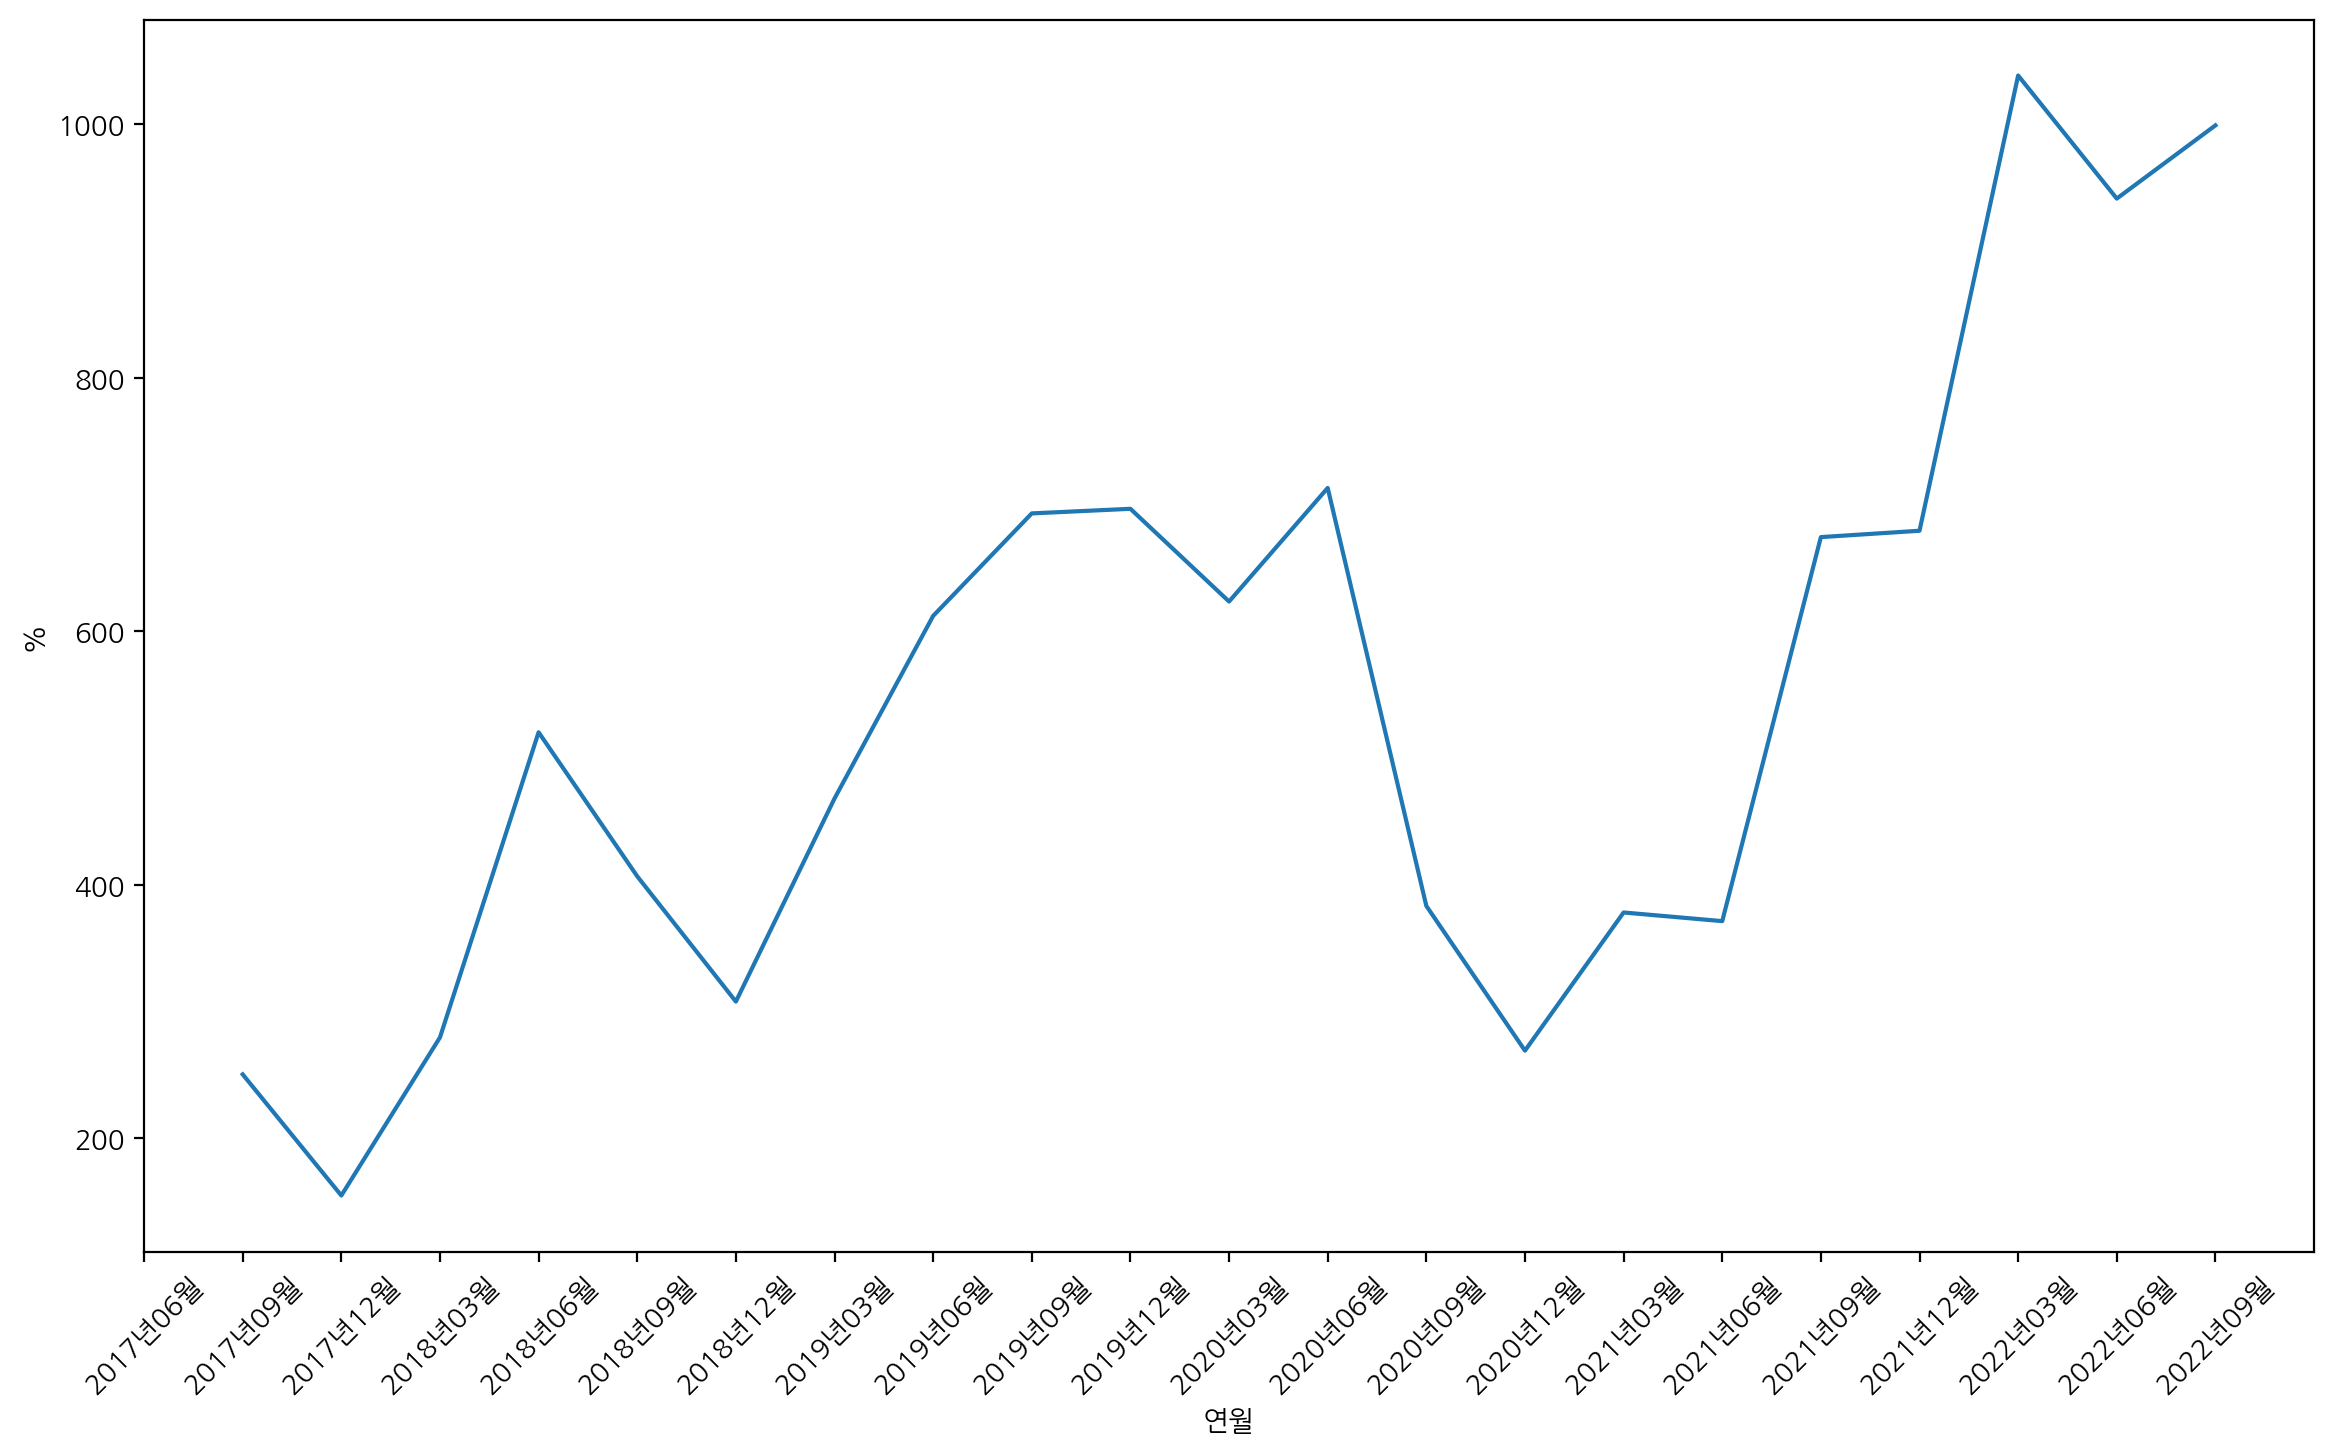

In [14]:
LCR_visualization = sns.lineplot(data = 유동성커버리지비율, x = '연월', y = '%')
LCR_visualization.figure.set_size_inches(14, 8)
plt.xticks(rotation=45);

##### LCR-NSFR 비교 시각화
* 그래프만 보았을 때에는 유동성커버리지비율에 비해 순안정자금조달비율이 너무 낮은 것 아닌가 할 수 있지만
* 타 은행과 비교해 보았을 때 순안정자금비율은 오히려 같거나 높은 편임을 알 수 있음

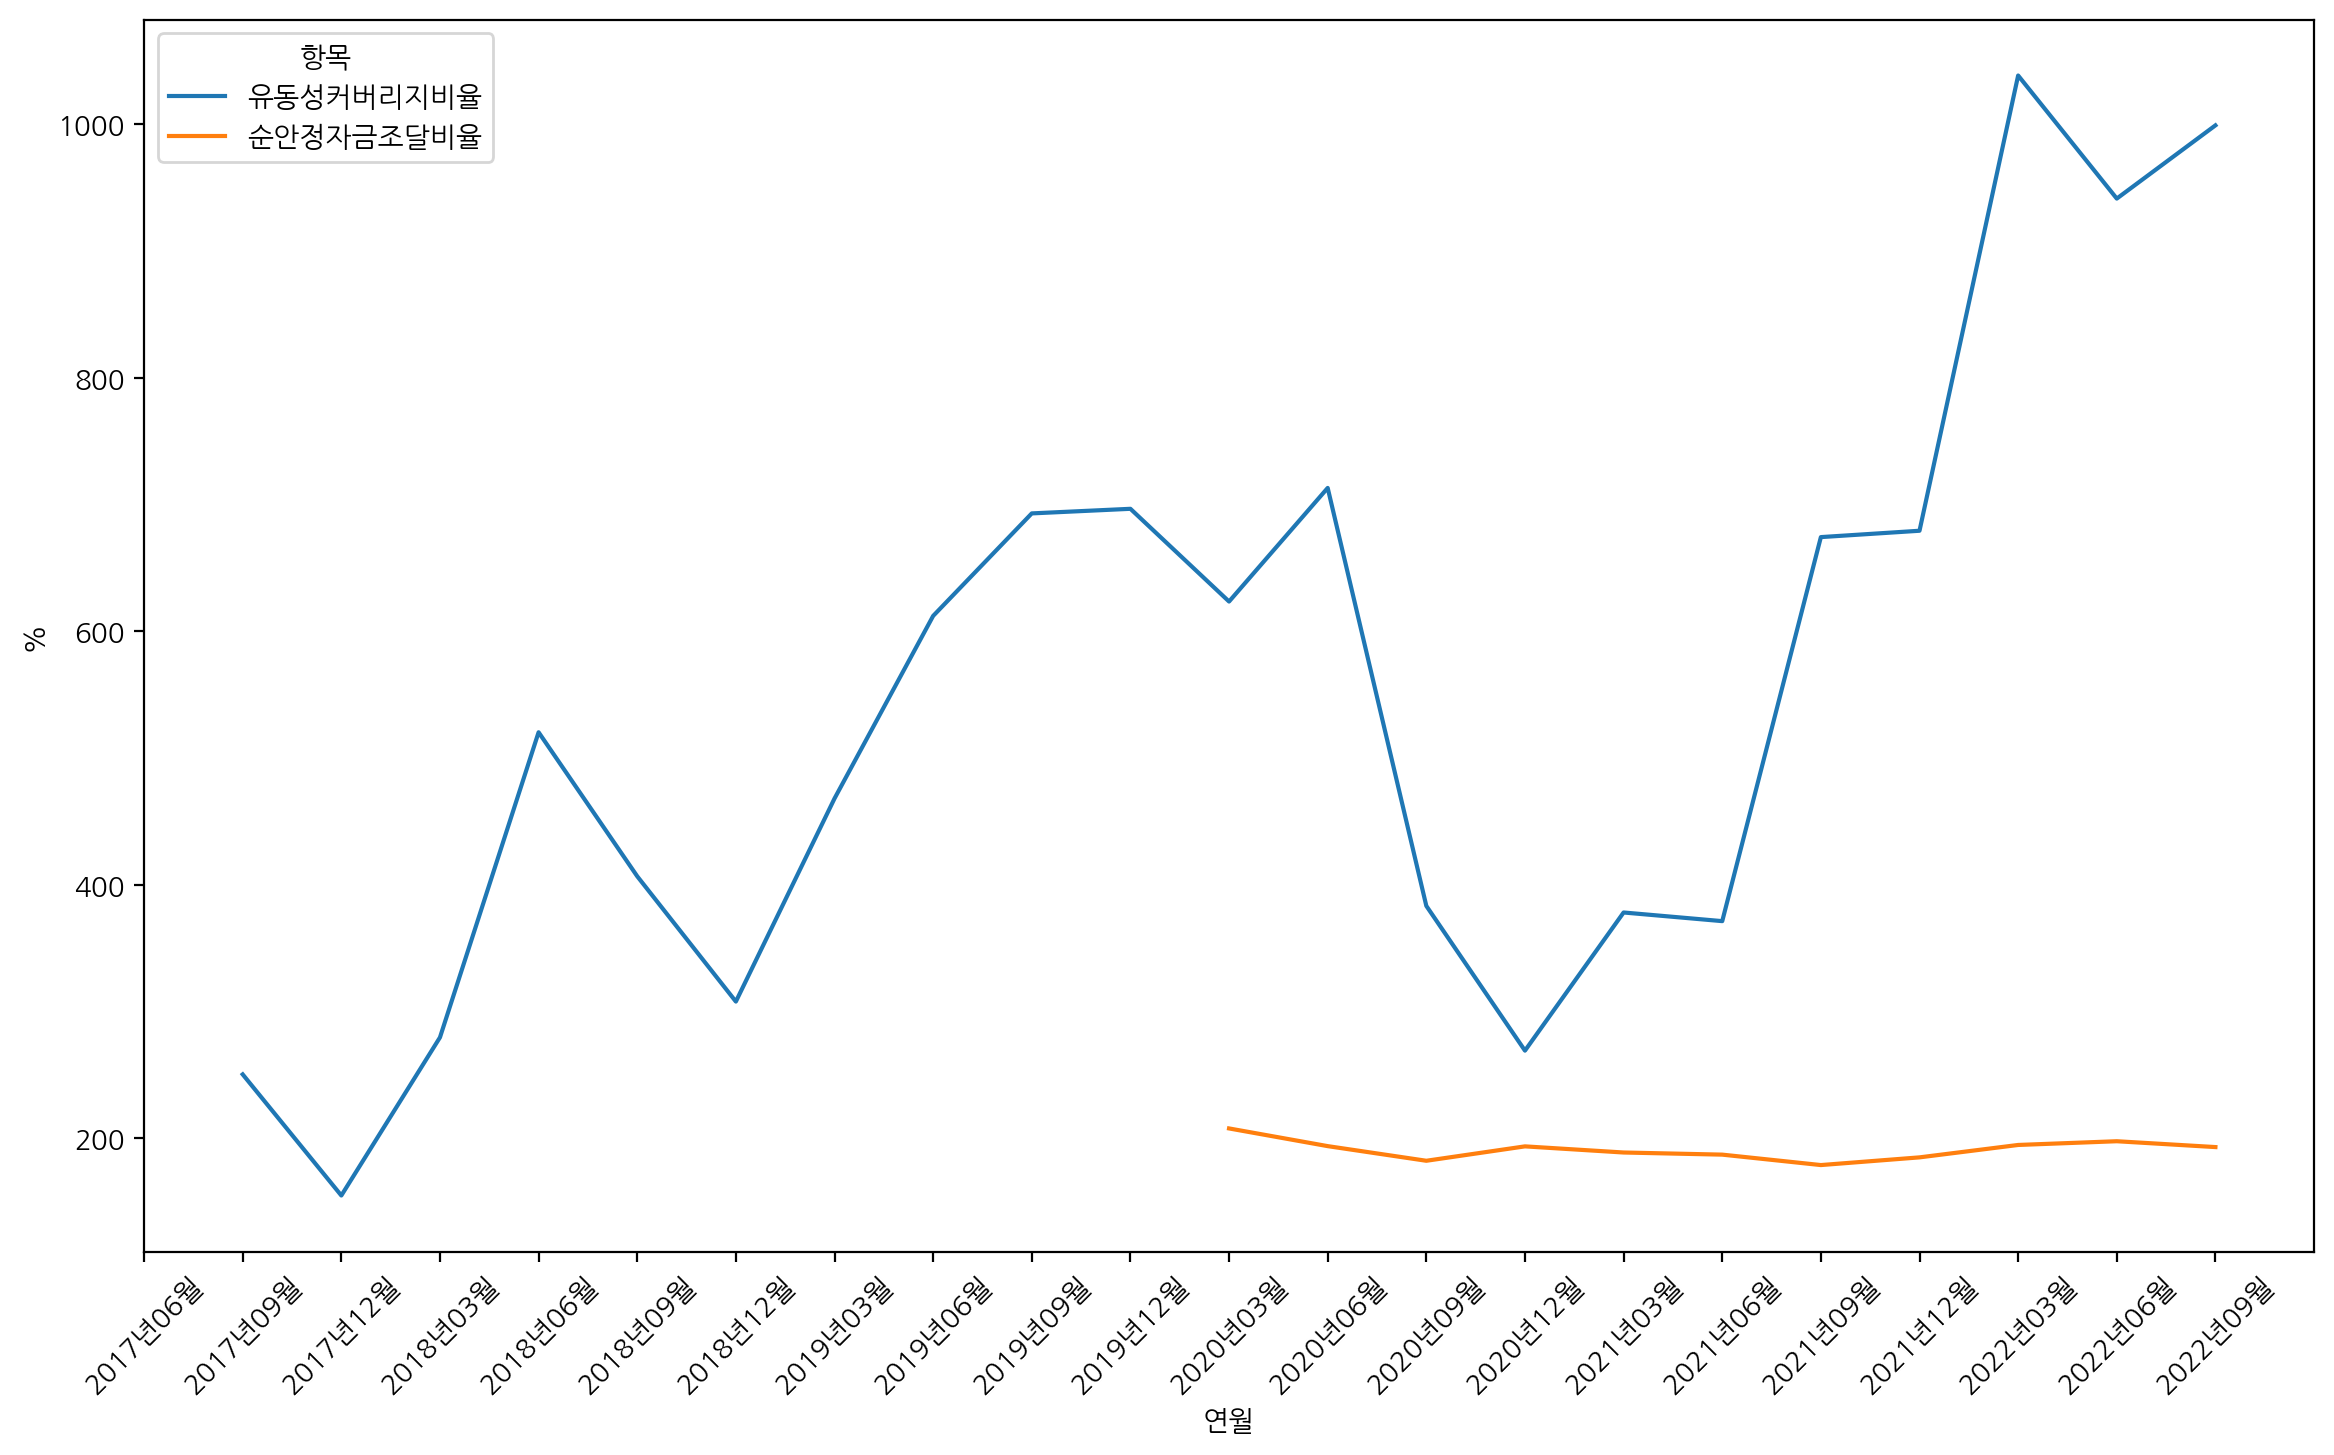

In [15]:

순안정자금_유동성커버리지 = df[(df['항목'] == '순안정자금조달비율')|(df['항목'] == '유동성커버리지비율')].reset_index(drop = True).rename(columns={'백만원':'%'})
LCR_NSFR_visualization = sns.lineplot(data = 순안정자금_유동성커버리지, x = '연월', y = '%', hue = '항목')
LCR_NSFR_visualization.figure.set_size_inches(14, 8)
plt.xticks(rotation=45);

##### 총 고유동성자산 과 순현금 유출액 비교
* 이 지표만 보았을 떄 안정적임을 알 수 있음

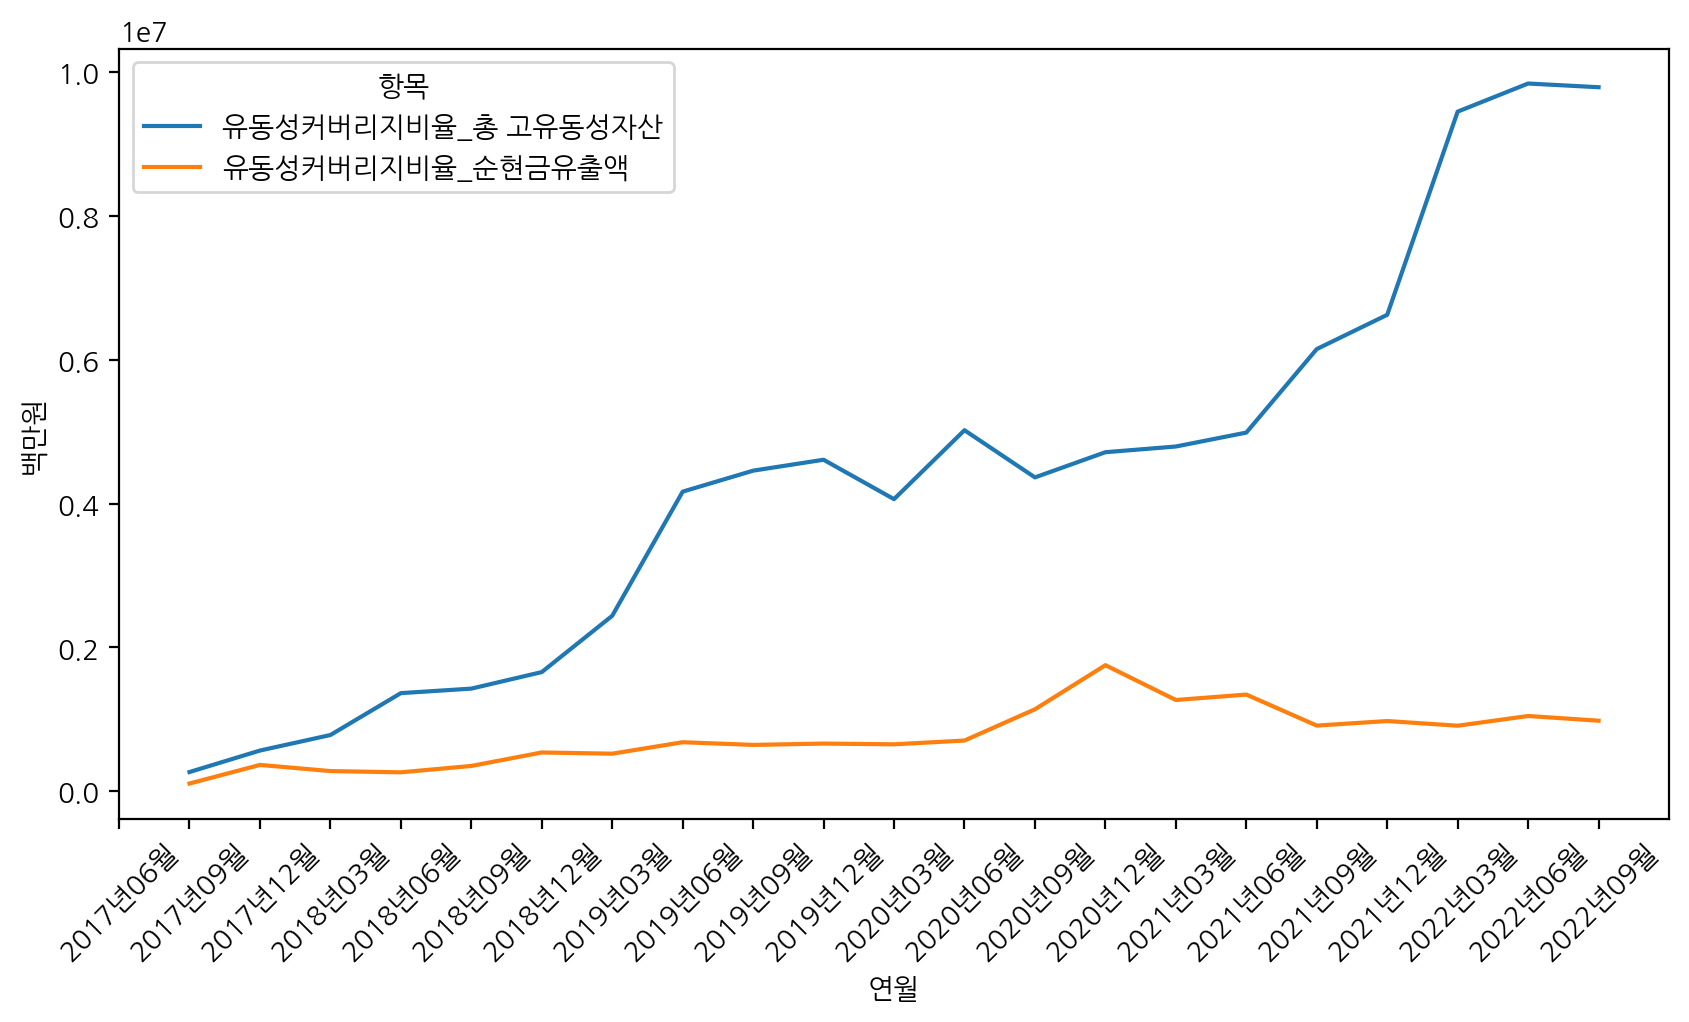

In [16]:
총고유동성자산_순현금유출액 = df[(df['항목'] == '유동성커버리지비율_총 고유동성자산')|(df['항목'] == '유동성커버리지비율_순현금유출액')].reset_index(drop = True)
자산_유출액 = sns.lineplot(data = 총고유동성자산_순현금유출액, x = '연월', y = '백만원', hue = '항목')
자산_유출액 .figure.set_size_inches(10, 5)
plt.xticks(rotation=45);

##### 안정자금가용금액 과 순현금유출액 비교
* 제대로된 비교인지는 모르겠으나 매우 안정적으로 보임

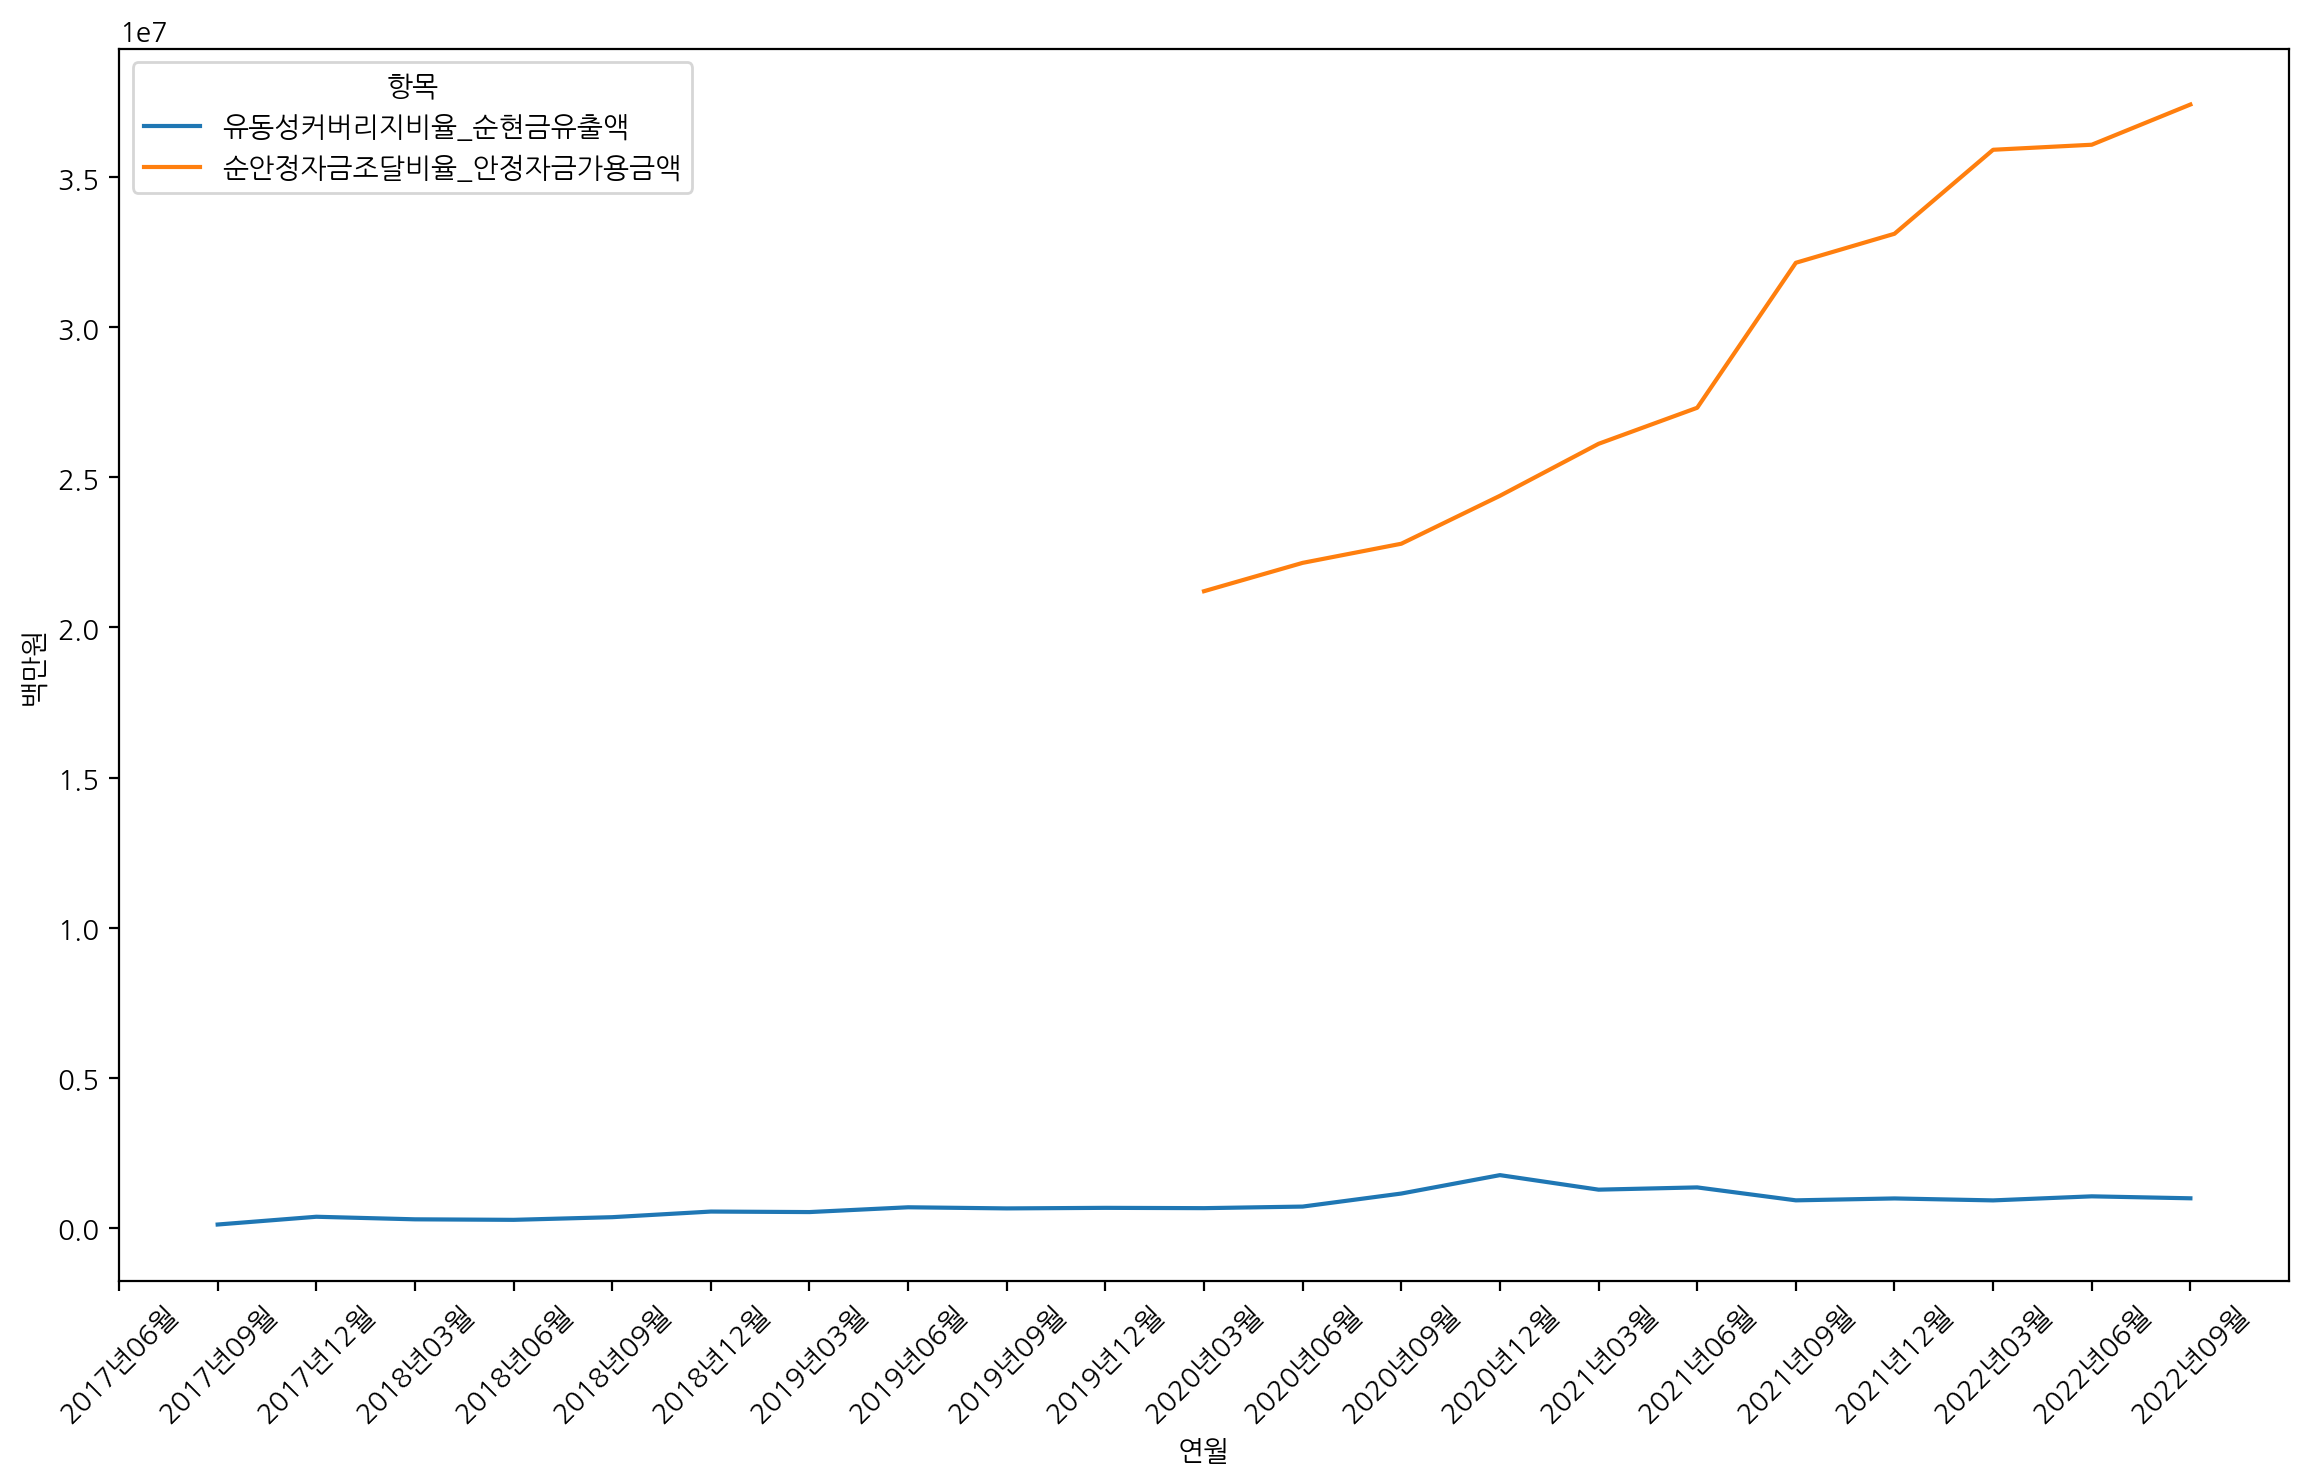

In [17]:
안정자금가용금액_순현금유출액 = df[(df['항목'] == '순안정자금조달비율_안정자금가용금액')|(df['항목'] == '유동성커버리지비율_순현금유출액')].reset_index(drop = True)
가용금액_유출액 = sns.lineplot(data = 안정자금가용금액_순현금유출액, x = '연월', y = '백만원', hue = '항목')
가용금액_유출액.figure.set_size_inches(14, 8)
plt.xticks(rotation=45);

##### 순안정자금조달비율 시각화

In [18]:
순안정자금조달비율

,회사명,항목,연월,%
0,주식회사 카카오뱅크,순안정자금조달비율,2017년03월,NaN
1,주식회사 카카오뱅크,순안정자금조달비율,2017년06월,NaN
2,주식회사 카카오뱅크,순안정자금조달비율,2017년09월,NaN
3,주식회사 카카오뱅크,순안정자금조달비율,2017년12월,NaN
4,주식회사 카카오뱅크,순안정자금조달비율,2018년03월,NaN
5,주식회사 카카오뱅크,순안정자금조달비율,2018년06월,NaN
6,주식회사 카카오뱅크,순안정자금조달비율,2018년09월,NaN
7,주식회사 카카오뱅크,순안정자금조달비율,2018년12월,NaN
8,주식회사 카카오뱅크,순안정자금조달비율,2019년03월,NaN
9,주식회사 카카오뱅크,순안정자금조달비율,2019년06월,NaN


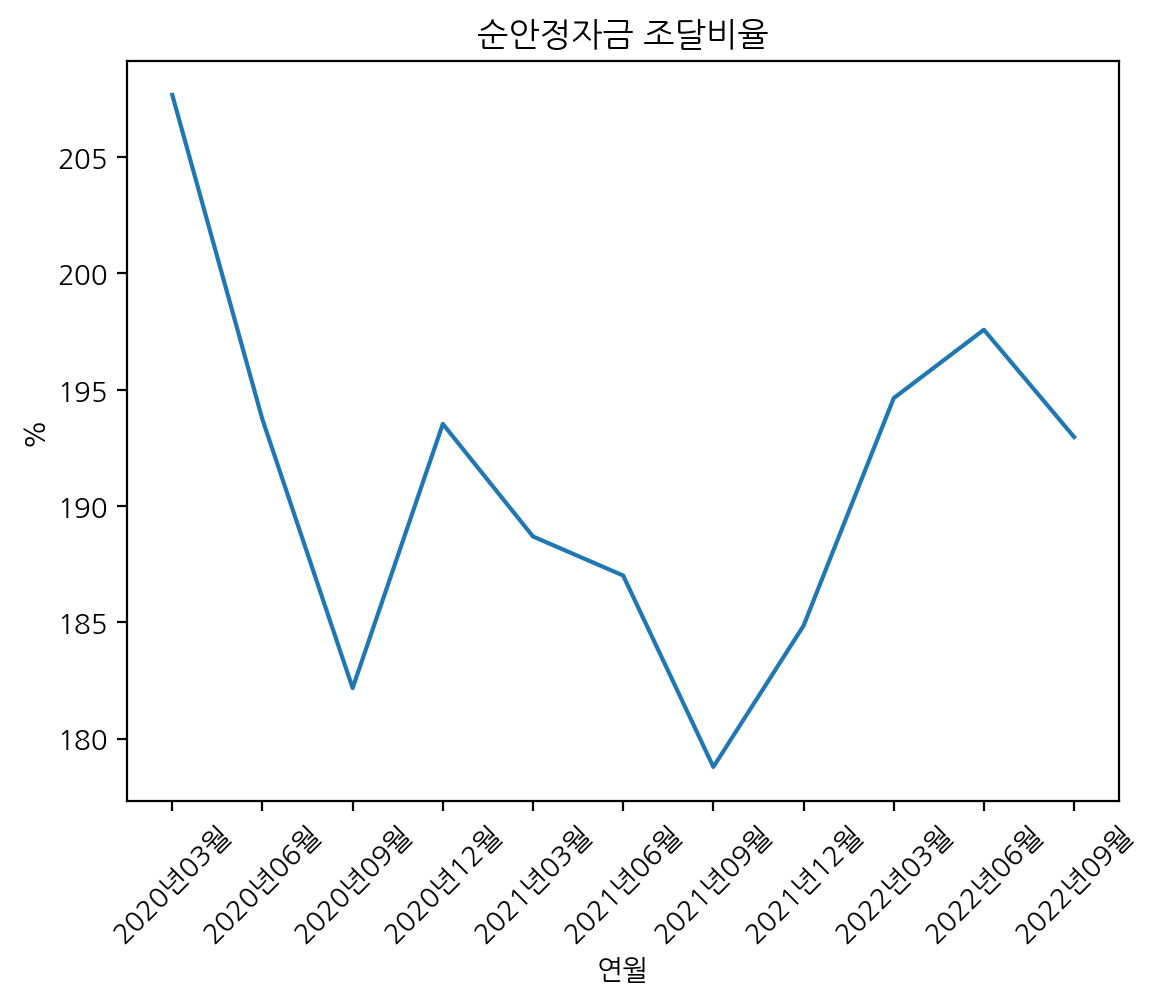

In [19]:
sns.lineplot(data = 순안정자금조달비율, x = '연월', y = '%')
plt.xticks(rotation=45)
plt.title('순안정자금 조달비율');

##### 순안정자금조달비율 category 시각화

<AxesSubplot:xlabel='연월', ylabel='%'>

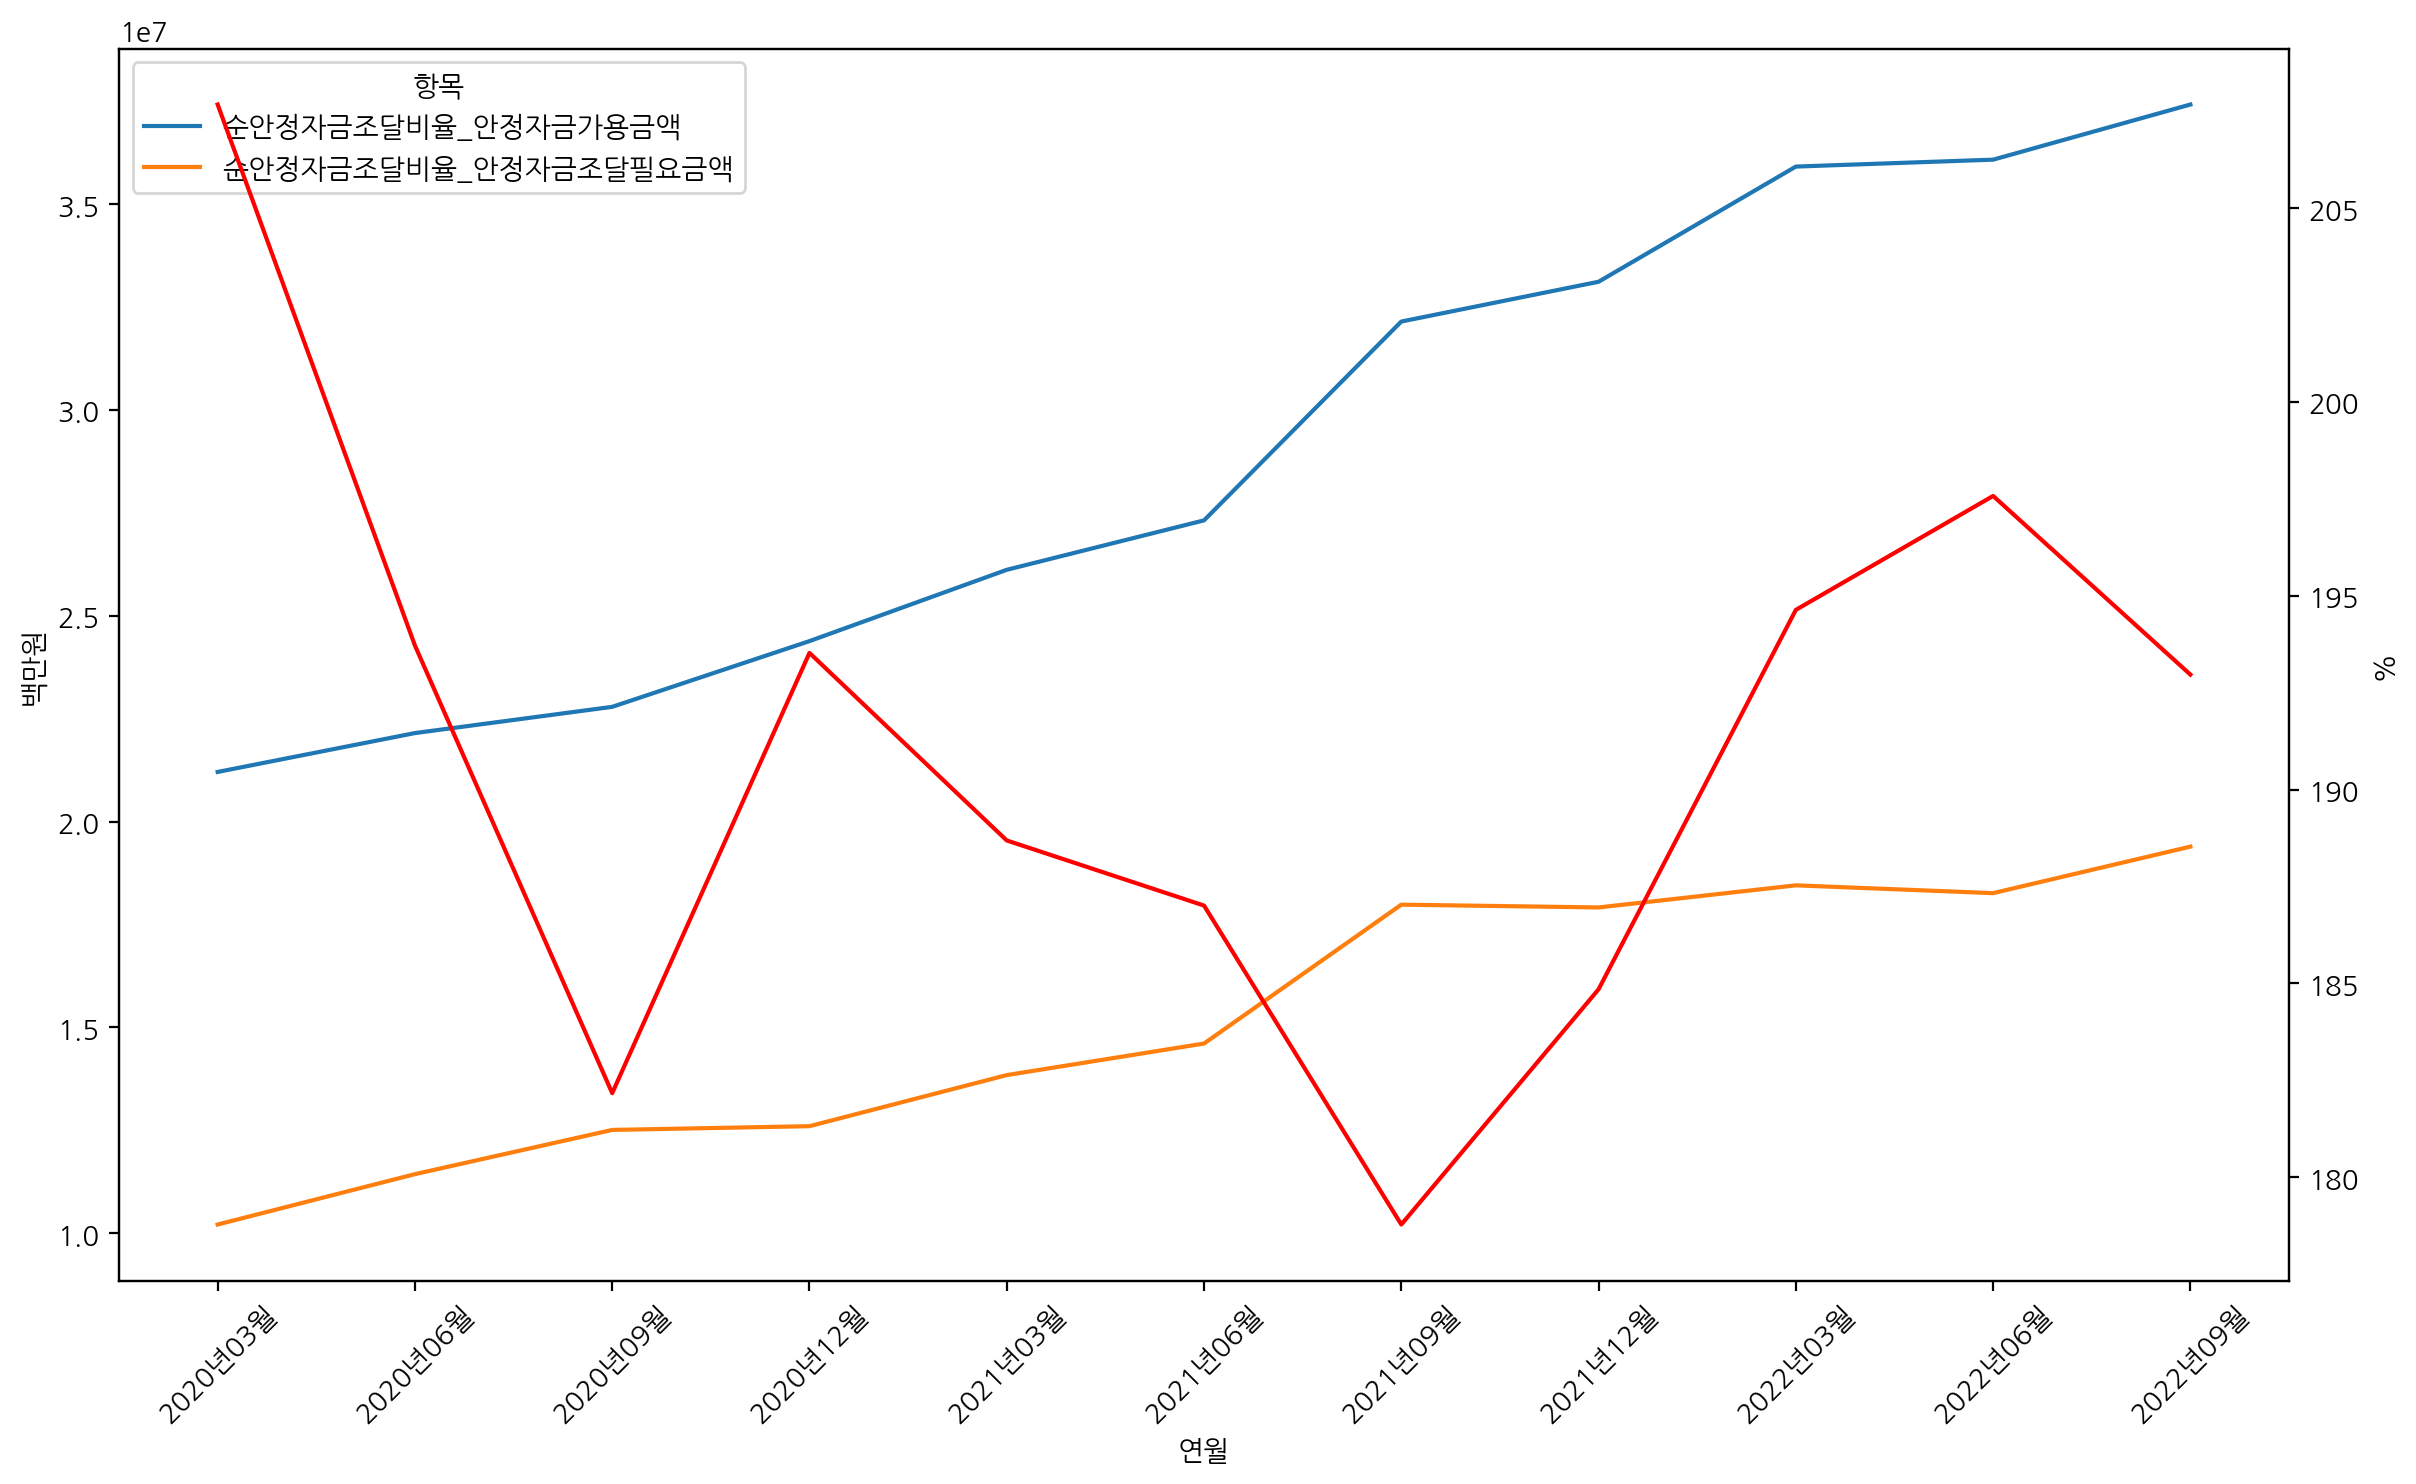

In [20]:
순안정자금조달비율_cate = df[df['항목'].str.contains('순안정자금조달비율')]
순안정자금조달비율_cate = df[(df['항목'] == '순안정자금조달비율_안정자금가용금액')|(df['항목'] == '순안정자금조달비율_안정자금조달필요금액')]
순안정자금조달비율_cate_비교 = sns.lineplot(data = 순안정자금조달비율_cate, x = '연월', y = '백만원', hue = '항목')
순안정자금조달비율_cate_비교.figure.set_size_inches(14, 8)
plt.xticks(rotation=45)
순안정자금조달비율_cate_비교.twinx()
# ax2.plot('연월', '%', data = 순안정자금조달비율)
sns.lineplot(data = 순안정자금조달비율, x = '연월', y = '%', color='red')

##### 연체율 시각화
* 총 대출채권 연체율이 계속 높아지는 추세임을 알 수 있음
* PF 대출과 관련된 자료만 뽑아내기 위해 디른 것을 뽑아야할 수도
* 대출채권 연체율이 높다는 것은 회스율이 높지 않다는 뜻인건가?

In [21]:
colsss = pd.read_excel('data/FISIS_연체율_201703-202209.xls').iloc[0]
연체율_base = pd.read_excel('data/FISIS_연체율_201703-202209.xls')
연체율_base.columns = colsss
연체율_base = 연체율_base.iloc[1:].reset_index(drop = True)
연체율_base = 연체율_base.melt(id_vars = 연체율_base.columns[:7], var_name="연월", value_name='%')
연체율_base = 연체율_base.drop(['회사코드', '보고서명', '보고서코드', 'factor_id', '단위'], axis = 1)

In [22]:
연체율_base['항목'].unique()

array(['총대출채권', '총대출채권_연체율', '기업대출_연체율', '기업대출_대기업대출_연체율',
       '기업대출_중소기업대출_연체율', '기기업대출_중소기업대출_(개인사업자)_연체율', '가계대출_연체율'],
      dtype=object)

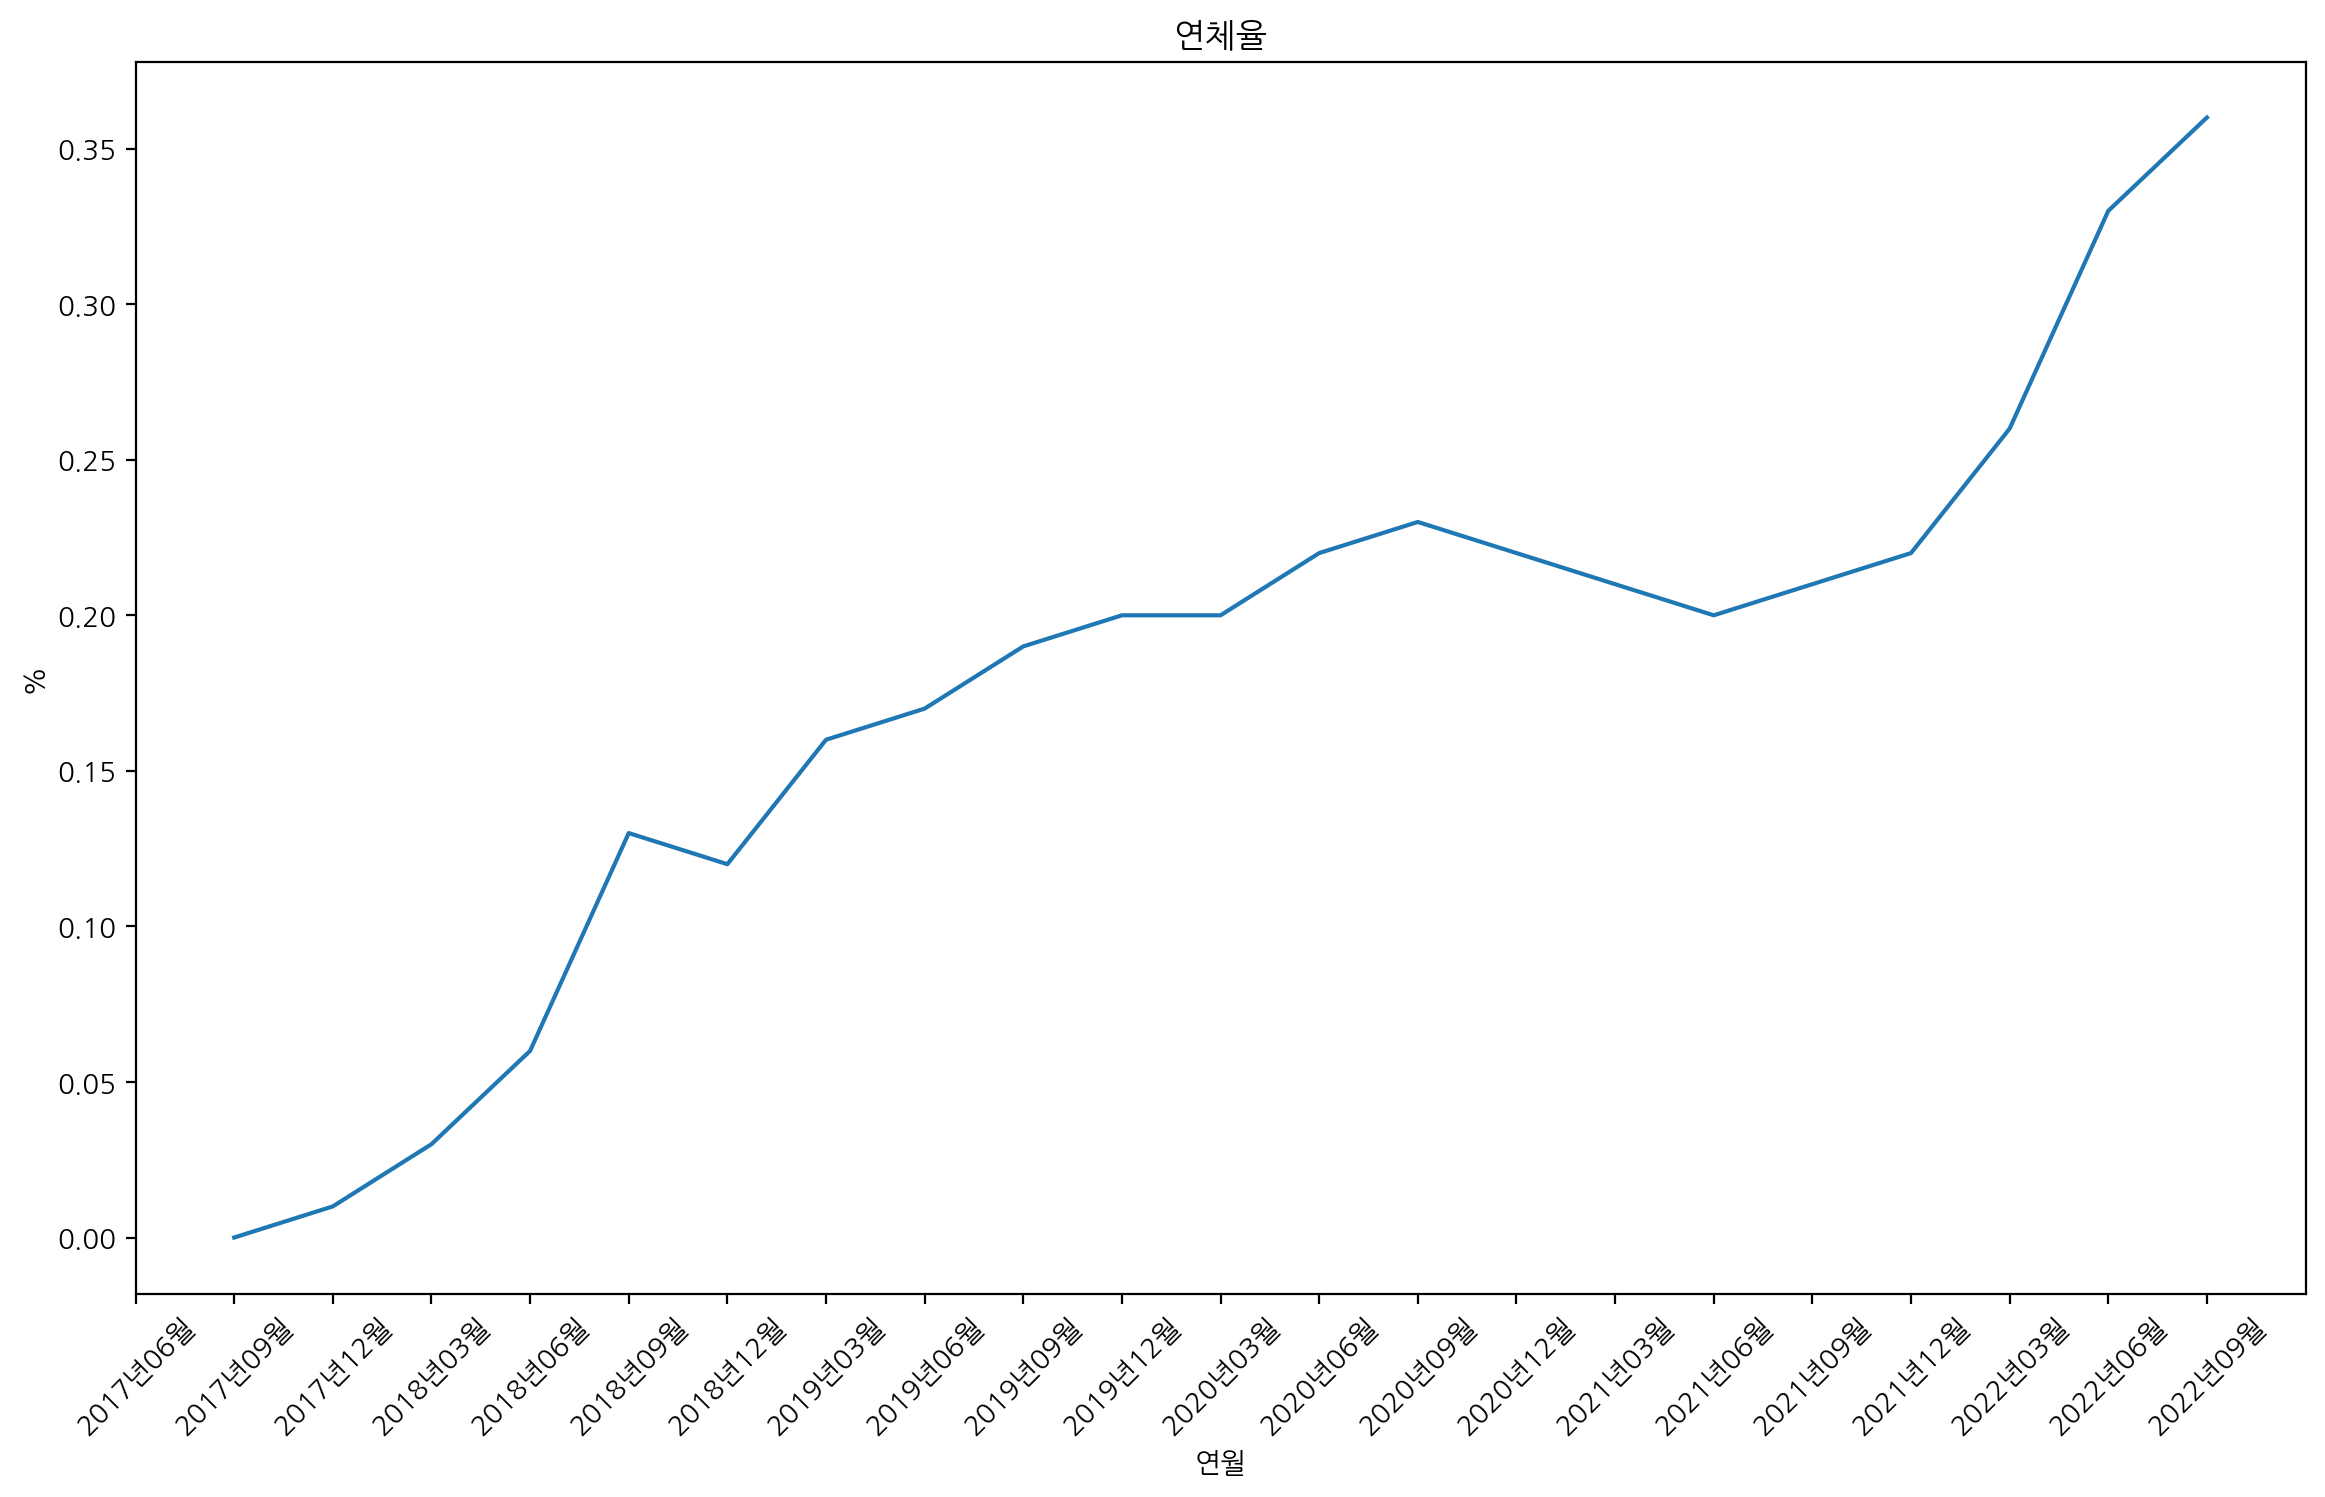

In [23]:
총대출채권_연체율 = sns.lineplot(data = 연체율_base[연체율_base['항목'] == '총대출채권_연체율'], x = '연월', y = '%')
총대출채권_연체율.figure.set_size_inches(14, 8)
plt.title('연체율')
plt.xticks(rotation=45);

##### 대손충당금적립비율(고정이하여신대비) 과 고정이하여신비율 구하고 시각화하기

In [24]:
여신건전성_base = pd.read_excel('data/FISIS_여신건전성_201703-202209.xls', header = 1) 
여신건전성_base = 여신건전성_base.melt(id_vars = 여신건전성_base.columns[:7],  var_name="연월", value_name='%')
여신건전성_base = 여신건전성_base.drop(['회사코드', '보고서명', '보고서코드', 'factor_id', '단위'], axis = 1)
여신건전성_base['항목'].unique()

array(['총여신', '총여신_은행계정', '총여신_은행계정_대출채권', '총여신_은행계정_유가증권 중 CP',
       '총여신_은행계정_기타채권', '총여신_은행계정_확정지급보증', '총여신_신탁계정', '총여신_ 신탁계정_신탁대출금',
       '총여신_신탁계정_사모사채', '총여신_신탁계정_CP', '총여신_종금계정', '총여신_종금계정_대출채권',
       '총여신_종금계정_금융리스채권', '총여신_종금계정_확정지급보증', '건전성분류결과', '건전성분류결과_정상',
       '건전성분류결과_요주의', '건전성분류결과_고정', '건전성분류결과_회수의문', '건전성분류결과_추정손실',
       '건전성분류결과_고정이하분류여신', '고정이하여신비율', '순고정이하여신비율', '기업여신:총여신',
       '기업여신_대기업:총여신', '기업여신_중소기업:총여신', '기업여신_중소기업_(개인사업자):총여신',
       '가계여신:총여신', '기업여신:고정이하여신', '기업여신_대기업:고정이하여신', '기업여신_중소기업:고정이하여신',
       '기업여신_중소기업_(개인사업자):고정이하여신', '가계여신:고정이하여신', '대손충당금적립잔액',
       '대손충당금적립비율(총여신대비)', '대손충당금적립비율(고정이하여신대비)'], dtype=object)

In [25]:
대손충당금적립비율_고정이하여신대비 = 여신건전성_base[여신건전성_base['항목'] == '대손충당금적립비율(고정이하여신대비)']
대손충당금적립비율_고정이하여신대비

,회사명,항목,연월,%
35,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2017년03월,NaN
71,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2017년06월,NaN
107,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2017년09월,32783.79
143,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2017년12월,2159.70
179,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2018년03월,714.80
215,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2018년06월,398.63
251,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2018년09월,267.96
287,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2018년12월,265.90
323,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2019년03월,206.56
359,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2019년06월,197.74


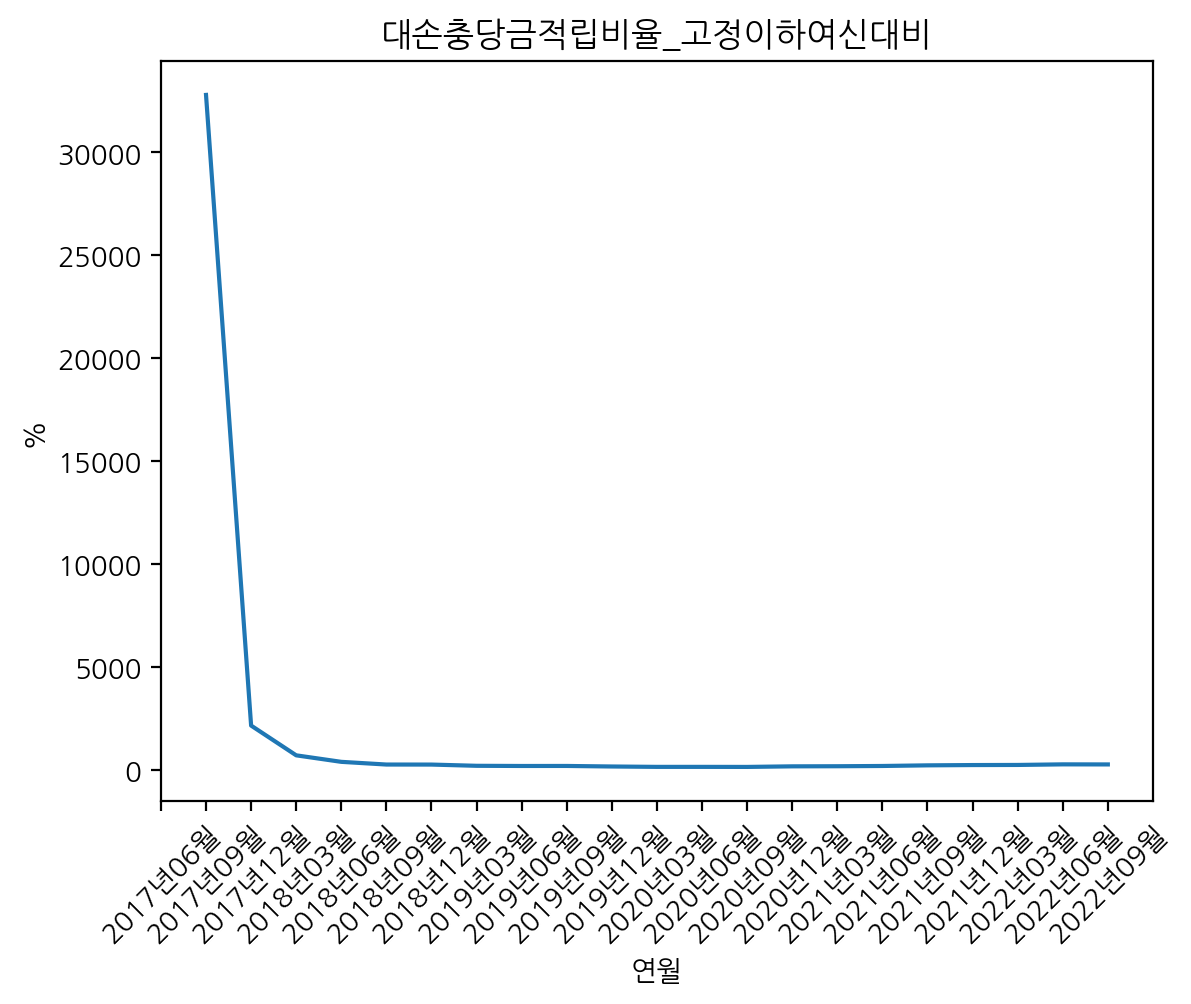

In [26]:
sns.lineplot(data = 대손충당금적립비율_고정이하여신대비, x = '연월', y = '%')
plt.title('대손충당금적립비율_고정이하여신대비')
plt.xticks(rotation=45);

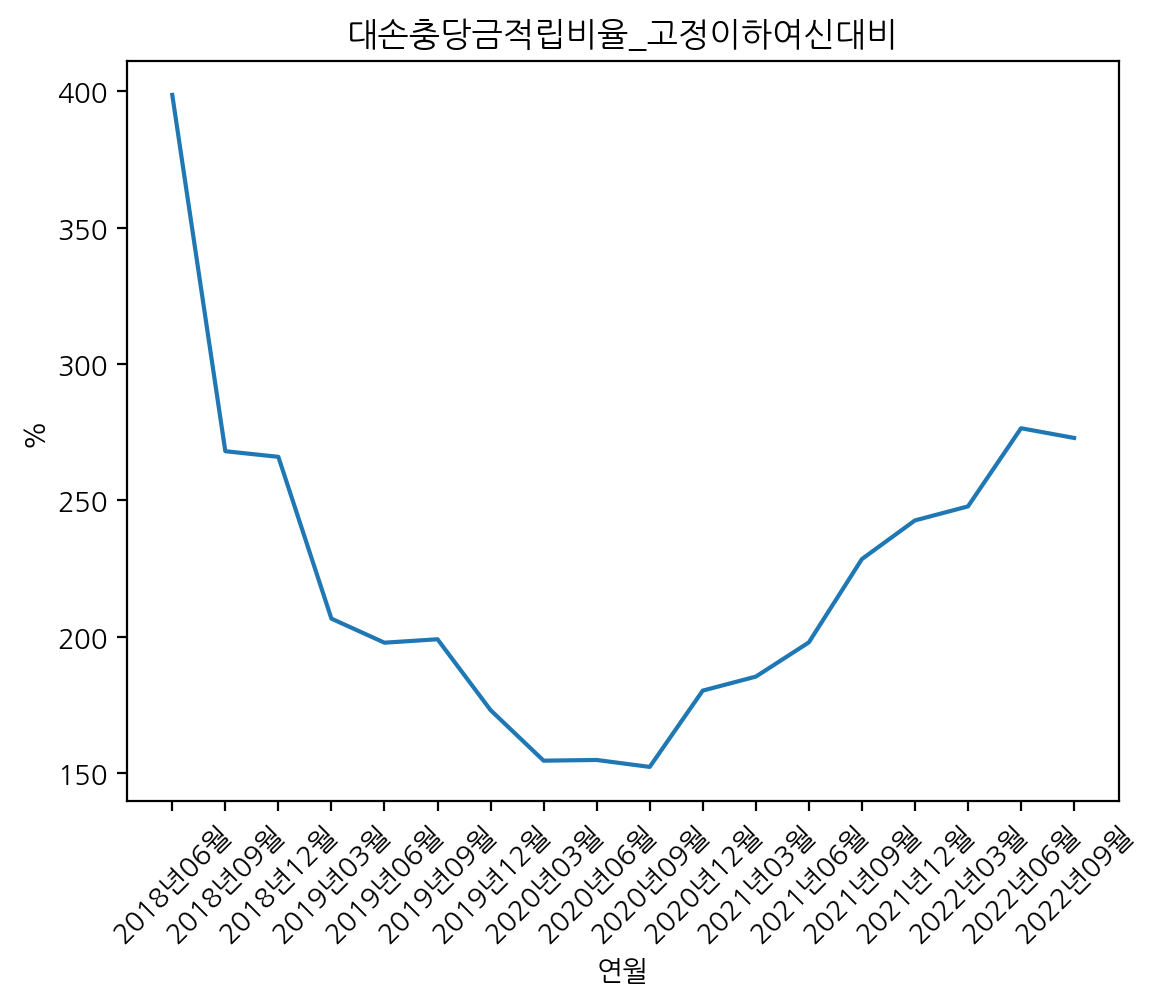

In [27]:
sns.lineplot(data = 대손충당금적립비율_고정이하여신대비[대손충당금적립비율_고정이하여신대비['연월']>='2018년06월'], x = '연월', y = '%')
plt.title('대손충당금적립비율_고정이하여신대비')
plt.xticks(rotation=45);


In [28]:
고정이하여신비율 = 여신건전성_base[여신건전성_base['항목'] == '고정이하여신비율']
고정이하여신비율

,회사명,항목,연월,%
21,주식회사 카카오뱅크,고정이하여신비율,2017년03월,NaN
57,주식회사 카카오뱅크,고정이하여신비율,2017년06월,NaN
93,주식회사 카카오뱅크,고정이하여신비율,2017년09월,0.00
129,주식회사 카카오뱅크,고정이하여신비율,2017년12월,0.02
165,주식회사 카카오뱅크,고정이하여신비율,2018년03월,0.04
201,주식회사 카카오뱅크,고정이하여신비율,2018년06월,0.08
237,주식회사 카카오뱅크,고정이하여신비율,2018년09월,0.12
273,주식회사 카카오뱅크,고정이하여신비율,2018년12월,0.13
309,주식회사 카카오뱅크,고정이하여신비율,2019년03월,0.18
345,주식회사 카카오뱅크,고정이하여신비율,2019년06월,0.20


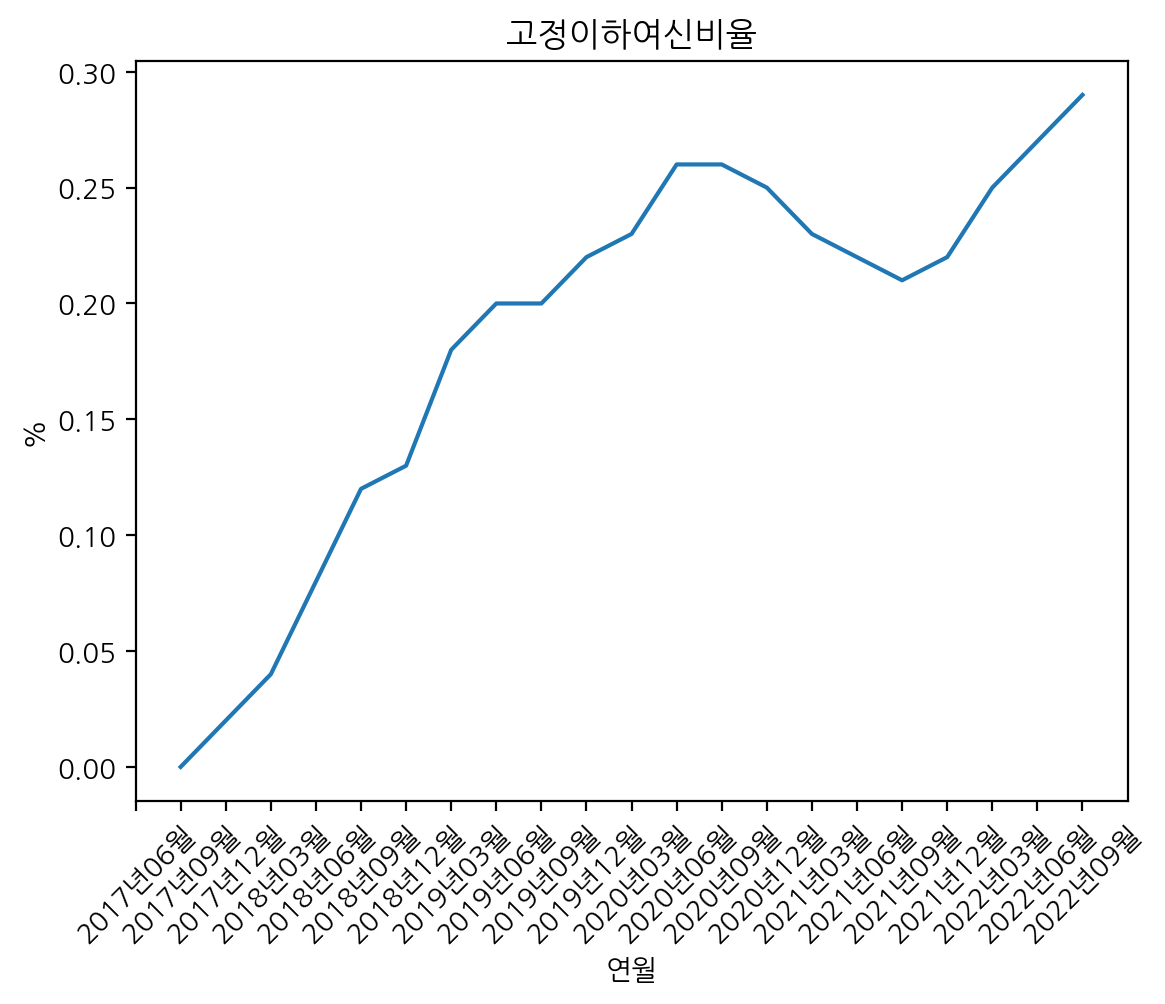

In [29]:
sns.lineplot(data = 고정이하여신비율, x = '연월', y = '%')
plt.title('고정이하여신비율')
plt.xticks(rotation=45);

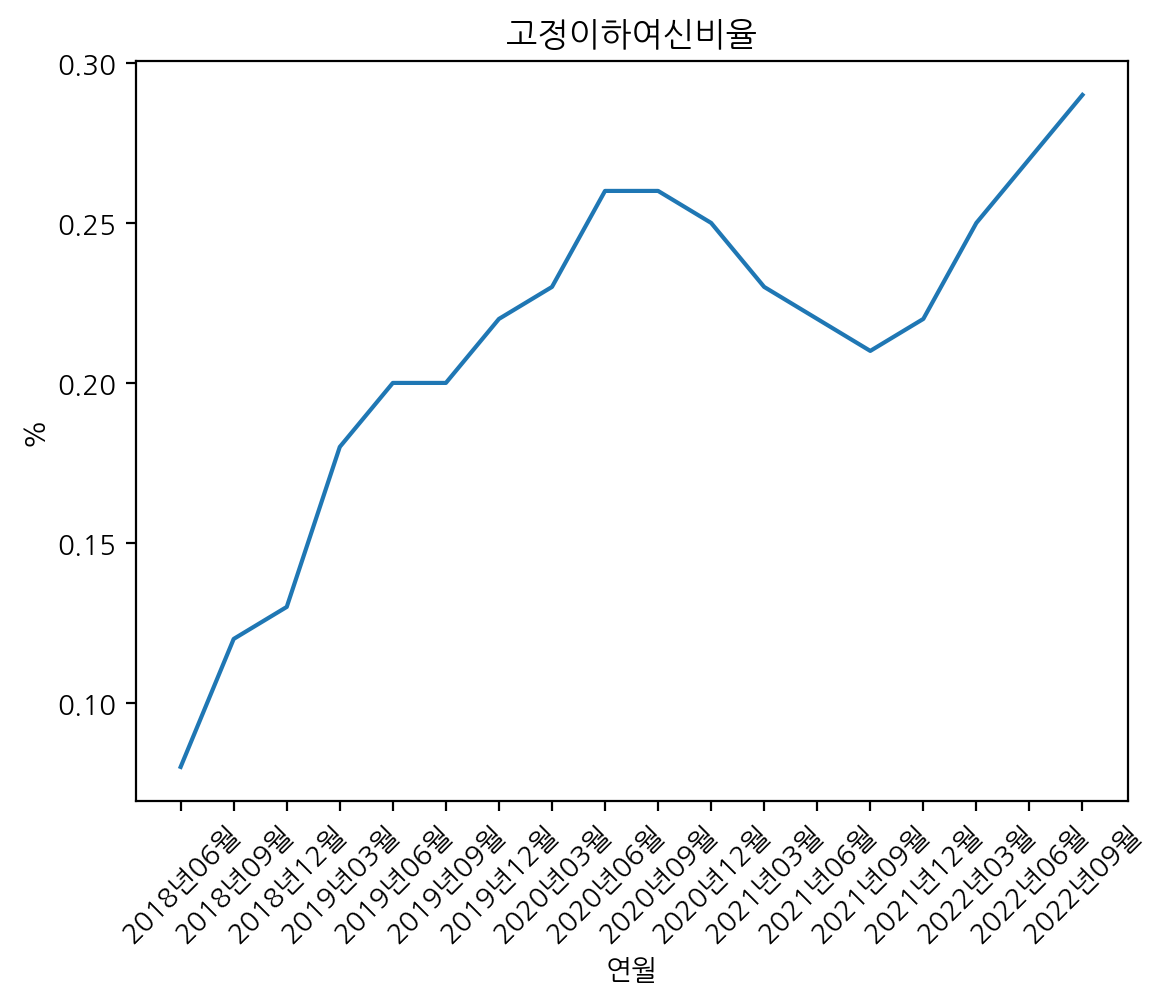

In [30]:
sns.lineplot(data = 고정이하여신비율[고정이하여신비율['연월']>='2018년06월'], x = '연월', y = '%')
plt.title('고정이하여신비율')
plt.xticks(rotation=45);

In [31]:
# 2021년 3분기 이상 자료
고정이하여신비율_af2021 = 여신건전성_base[(여신건전성_base['항목'] == '고정이하여신비율')&(여신건전성_base['연월'] >= '2021년09월')]
고정이하여신비율_af2021

,회사명,항목,연월,%
669,주식회사 카카오뱅크,고정이하여신비율,2021년09월,0.21
705,주식회사 카카오뱅크,고정이하여신비율,2021년12월,0.22
741,주식회사 카카오뱅크,고정이하여신비율,2022년03월,0.25
777,주식회사 카카오뱅크,고정이하여신비율,2022년06월,0.27
813,주식회사 카카오뱅크,고정이하여신비율,2022년09월,0.29


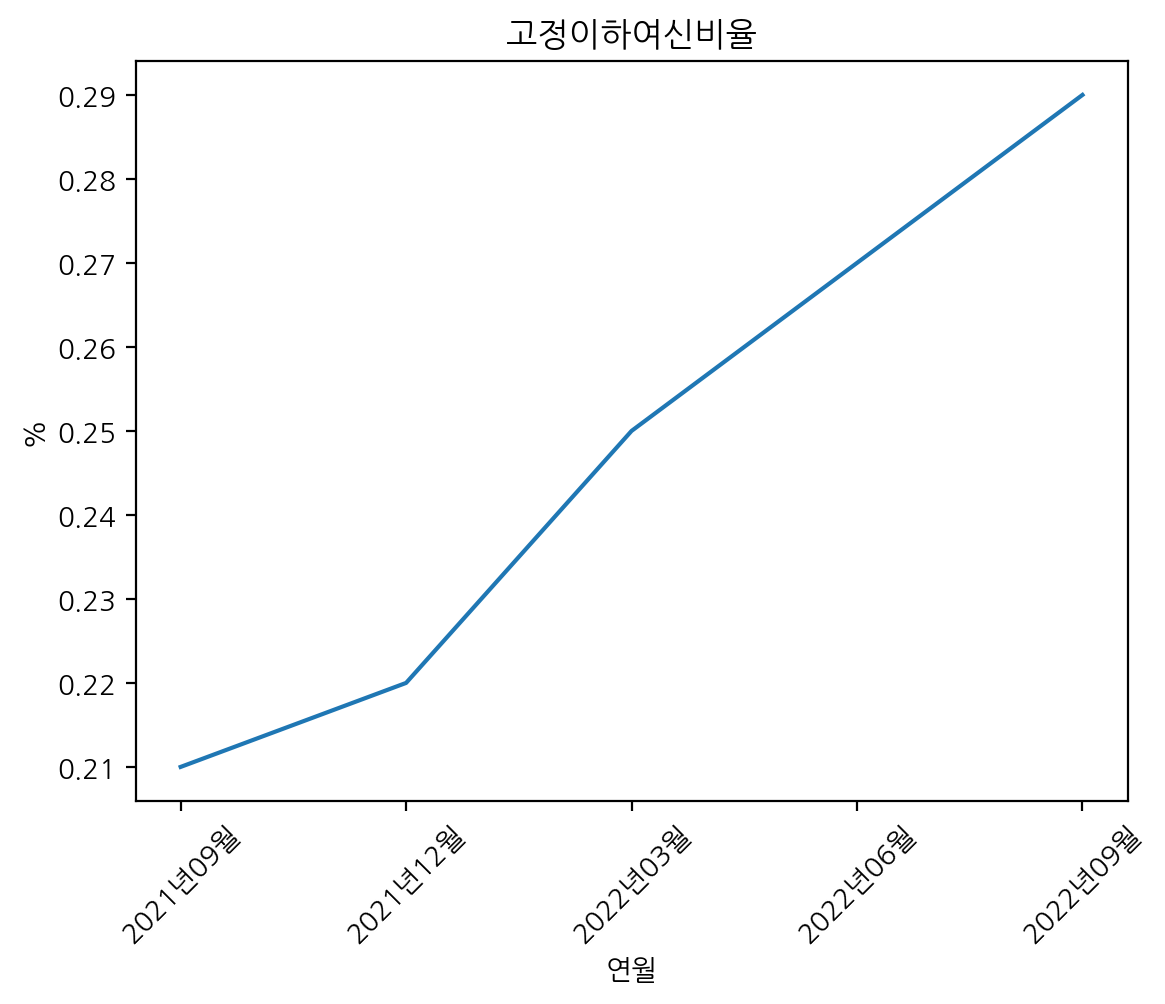

In [32]:
sns.lineplot(data = 고정이하여신비율_af2021, x = '연월', y = '%')
plt.title('고정이하여신비율')
plt.xticks(rotation=45);


#### 2021년 3분기 이상 자료 시각화

##### 총자산순이익률_ROA

In [33]:
총자산순이익률_ROA[총자산순이익률_ROA['연월'] >= '2021년09월']

,회사명,항목,연월,%
72,주식회사 카카오뱅크,총자산순이익률(ROA),2021년09월,NaN
76,주식회사 카카오뱅크,총자산순이익률(ROA),2021년12월,0.65
80,주식회사 카카오뱅크,총자산순이익률(ROA),2022년03월,NaN
84,주식회사 카카오뱅크,총자산순이익률(ROA),2022년06월,NaN
88,주식회사 카카오뱅크,총자산순이익률(ROA),2022년09월,NaN


##### 자기자본순이익률_ROE

In [34]:
자기자본순이익률_ROE[자기자본순이익률_ROE['연월'] >= '2021년09월']

,회사명,항목,연월,%
73,주식회사 카카오뱅크,자기자본순이익률(ROE),2021년09월,NaN
77,주식회사 카카오뱅크,자기자본순이익률(ROE),2021년12월,4.87
81,주식회사 카카오뱅크,자기자본순이익률(ROE),2022년03월,NaN
85,주식회사 카카오뱅크,자기자본순이익률(ROE),2022년06월,NaN
89,주식회사 카카오뱅크,자기자본순이익률(ROE),2022년09월,NaN


##### 유동성커버리지비율

In [35]:
유동성커버리지비율_af2021 = 유동성커버리지비율[유동성커버리지비율['연월'] >= '2021년09월']
유동성커버리지비율_af2021

,회사명,항목,연월,%
18,주식회사 카카오뱅크,유동성커버리지비율,2021년09월,674.25
19,주식회사 카카오뱅크,유동성커버리지비율,2021년12월,679.26
20,주식회사 카카오뱅크,유동성커버리지비율,2022년03월,1038.44
21,주식회사 카카오뱅크,유동성커버리지비율,2022년06월,941.34
22,주식회사 카카오뱅크,유동성커버리지비율,2022년09월,999.11


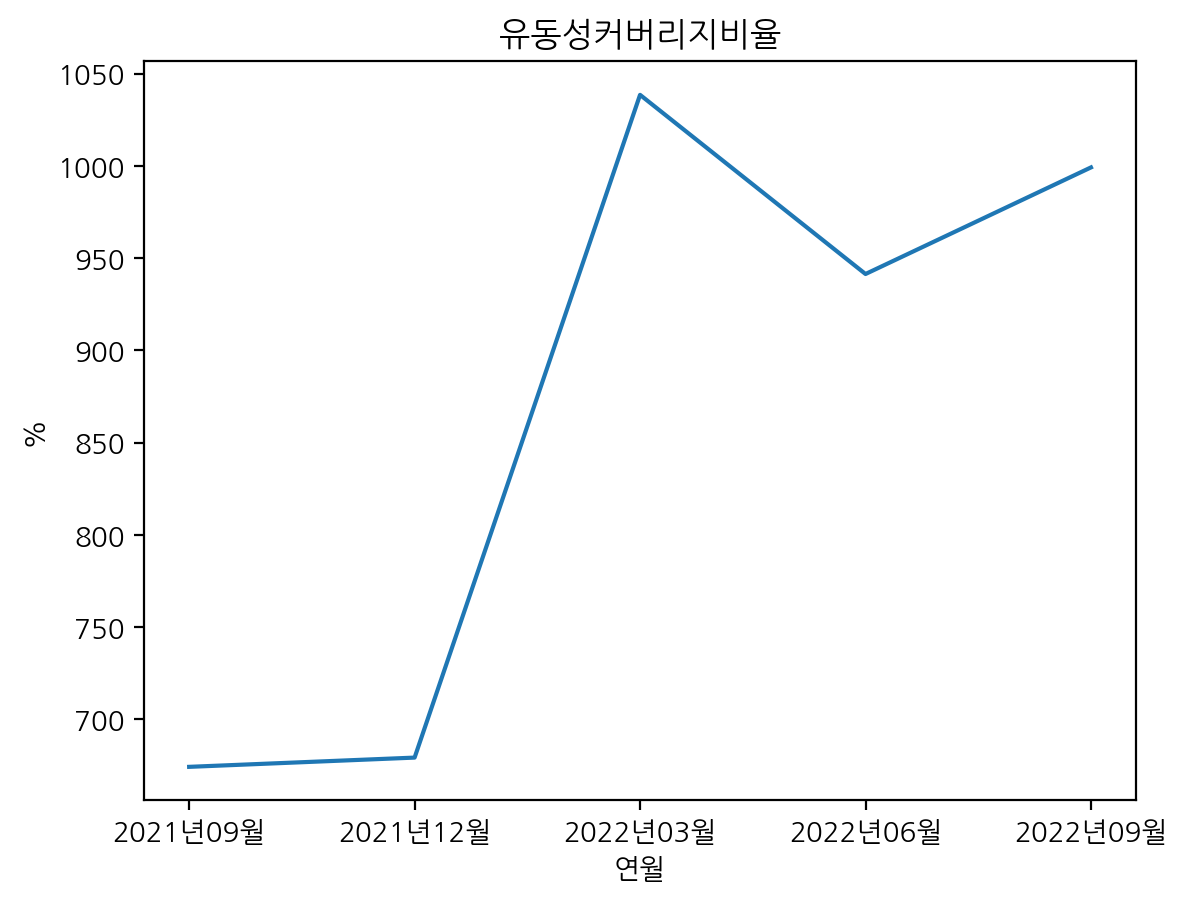

In [36]:
sns.lineplot(data = 유동성커버리지비율_af2021, x = '연월', y = '%')
plt.title('유동성커버리지비율');
# plt.xticks(rotation = 45);

##### LCR - NSFR 비교 시각화

In [37]:
순안정자금_유동성커버리지_af2021 = df[((df['항목'] == '순안정자금조달비율')|(df['항목'] == '유동성커버리지비율'))&(df['연월'] >= '2021년09월')].reset_index(drop = True).rename(columns={'백만원':'%'})
순안정자금_유동성커버리지_af2021

,회사명,항목,연월,%
0,주식회사 카카오뱅크,유동성커버리지비율,2021년09월,674.25
1,주식회사 카카오뱅크,순안정자금조달비율,2021년09월,178.78
2,주식회사 카카오뱅크,유동성커버리지비율,2021년12월,679.26
3,주식회사 카카오뱅크,순안정자금조달비율,2021년12월,184.85
4,주식회사 카카오뱅크,유동성커버리지비율,2022년03월,1038.44
5,주식회사 카카오뱅크,순안정자금조달비율,2022년03월,194.64
6,주식회사 카카오뱅크,유동성커버리지비율,2022년06월,941.34
7,주식회사 카카오뱅크,순안정자금조달비율,2022년06월,197.58
8,주식회사 카카오뱅크,유동성커버리지비율,2022년09월,999.11
9,주식회사 카카오뱅크,순안정자금조달비율,2022년09월,192.97


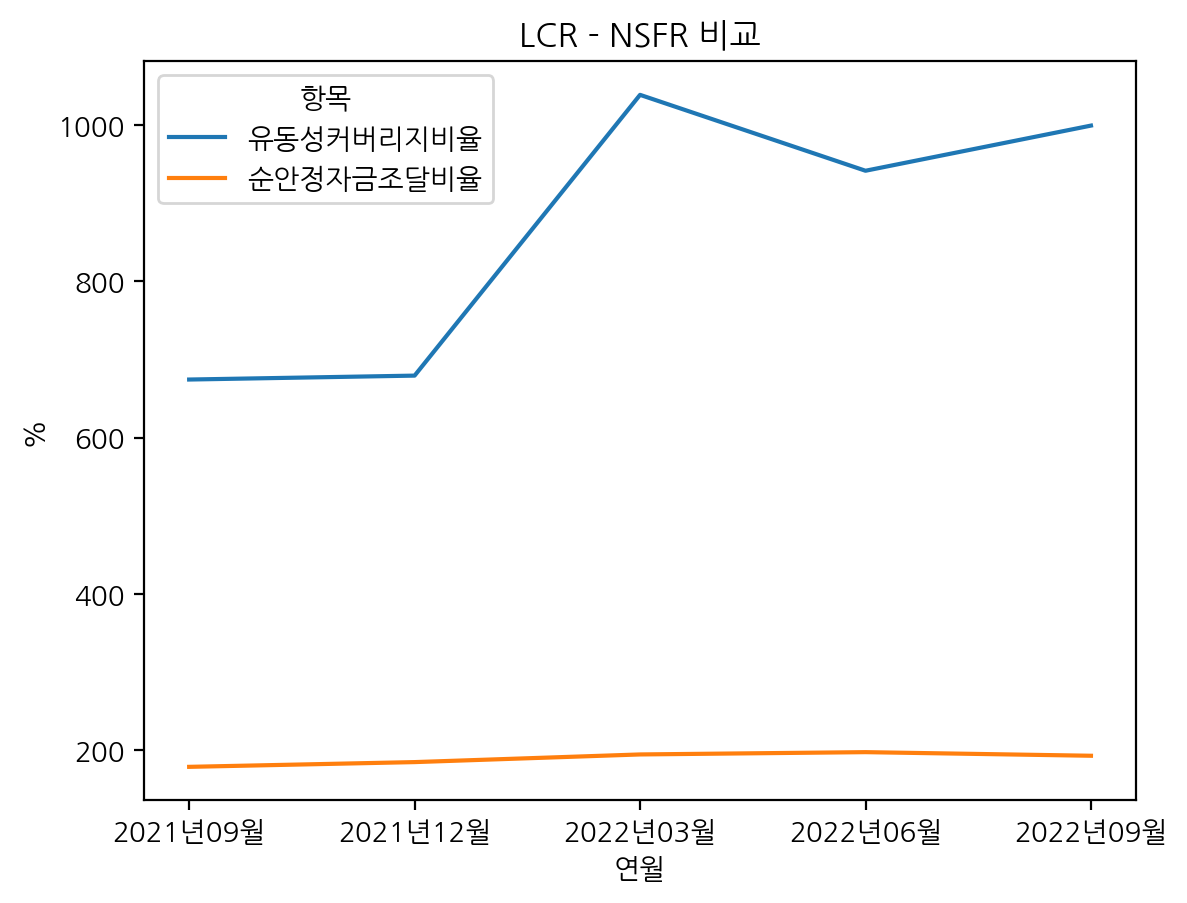

In [38]:
LCR_NSFR_visualization_af2021 = sns.lineplot(data = 순안정자금_유동성커버리지_af2021, x = '연월', y = '%', hue = '항목')
# LCR_NSFR_visualization_af2021.figure.set_size_inches(14, 8)
# plt.xticks(rotation=45)
plt.title('LCR - NSFR 비교');

##### 총 고유동성자산과 순현금유출액 비교

In [39]:
총고유동성자산_순현금유출액_af2021 = df[((df['항목'] == '유동성커버리지비율_총 고유동성자산')|(df['항목'] == '유동성커버리지비율_순현금유출액'))&(df['연월'] >= '2021년09월')].reset_index(drop = True)
총고유동성자산_순현금유출액_af2021

,회사명,항목,연월,백만원
0,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2021년09월,6147958
1,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2021년09월,911820
2,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2021년12월,6624543
3,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2021년12월,975264
4,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2022년03월,9450024
5,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2022년03월,910024
6,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2022년06월,9840990
7,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2022년06월,1045429
8,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2022년09월,9789467
9,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2022년09월,979815


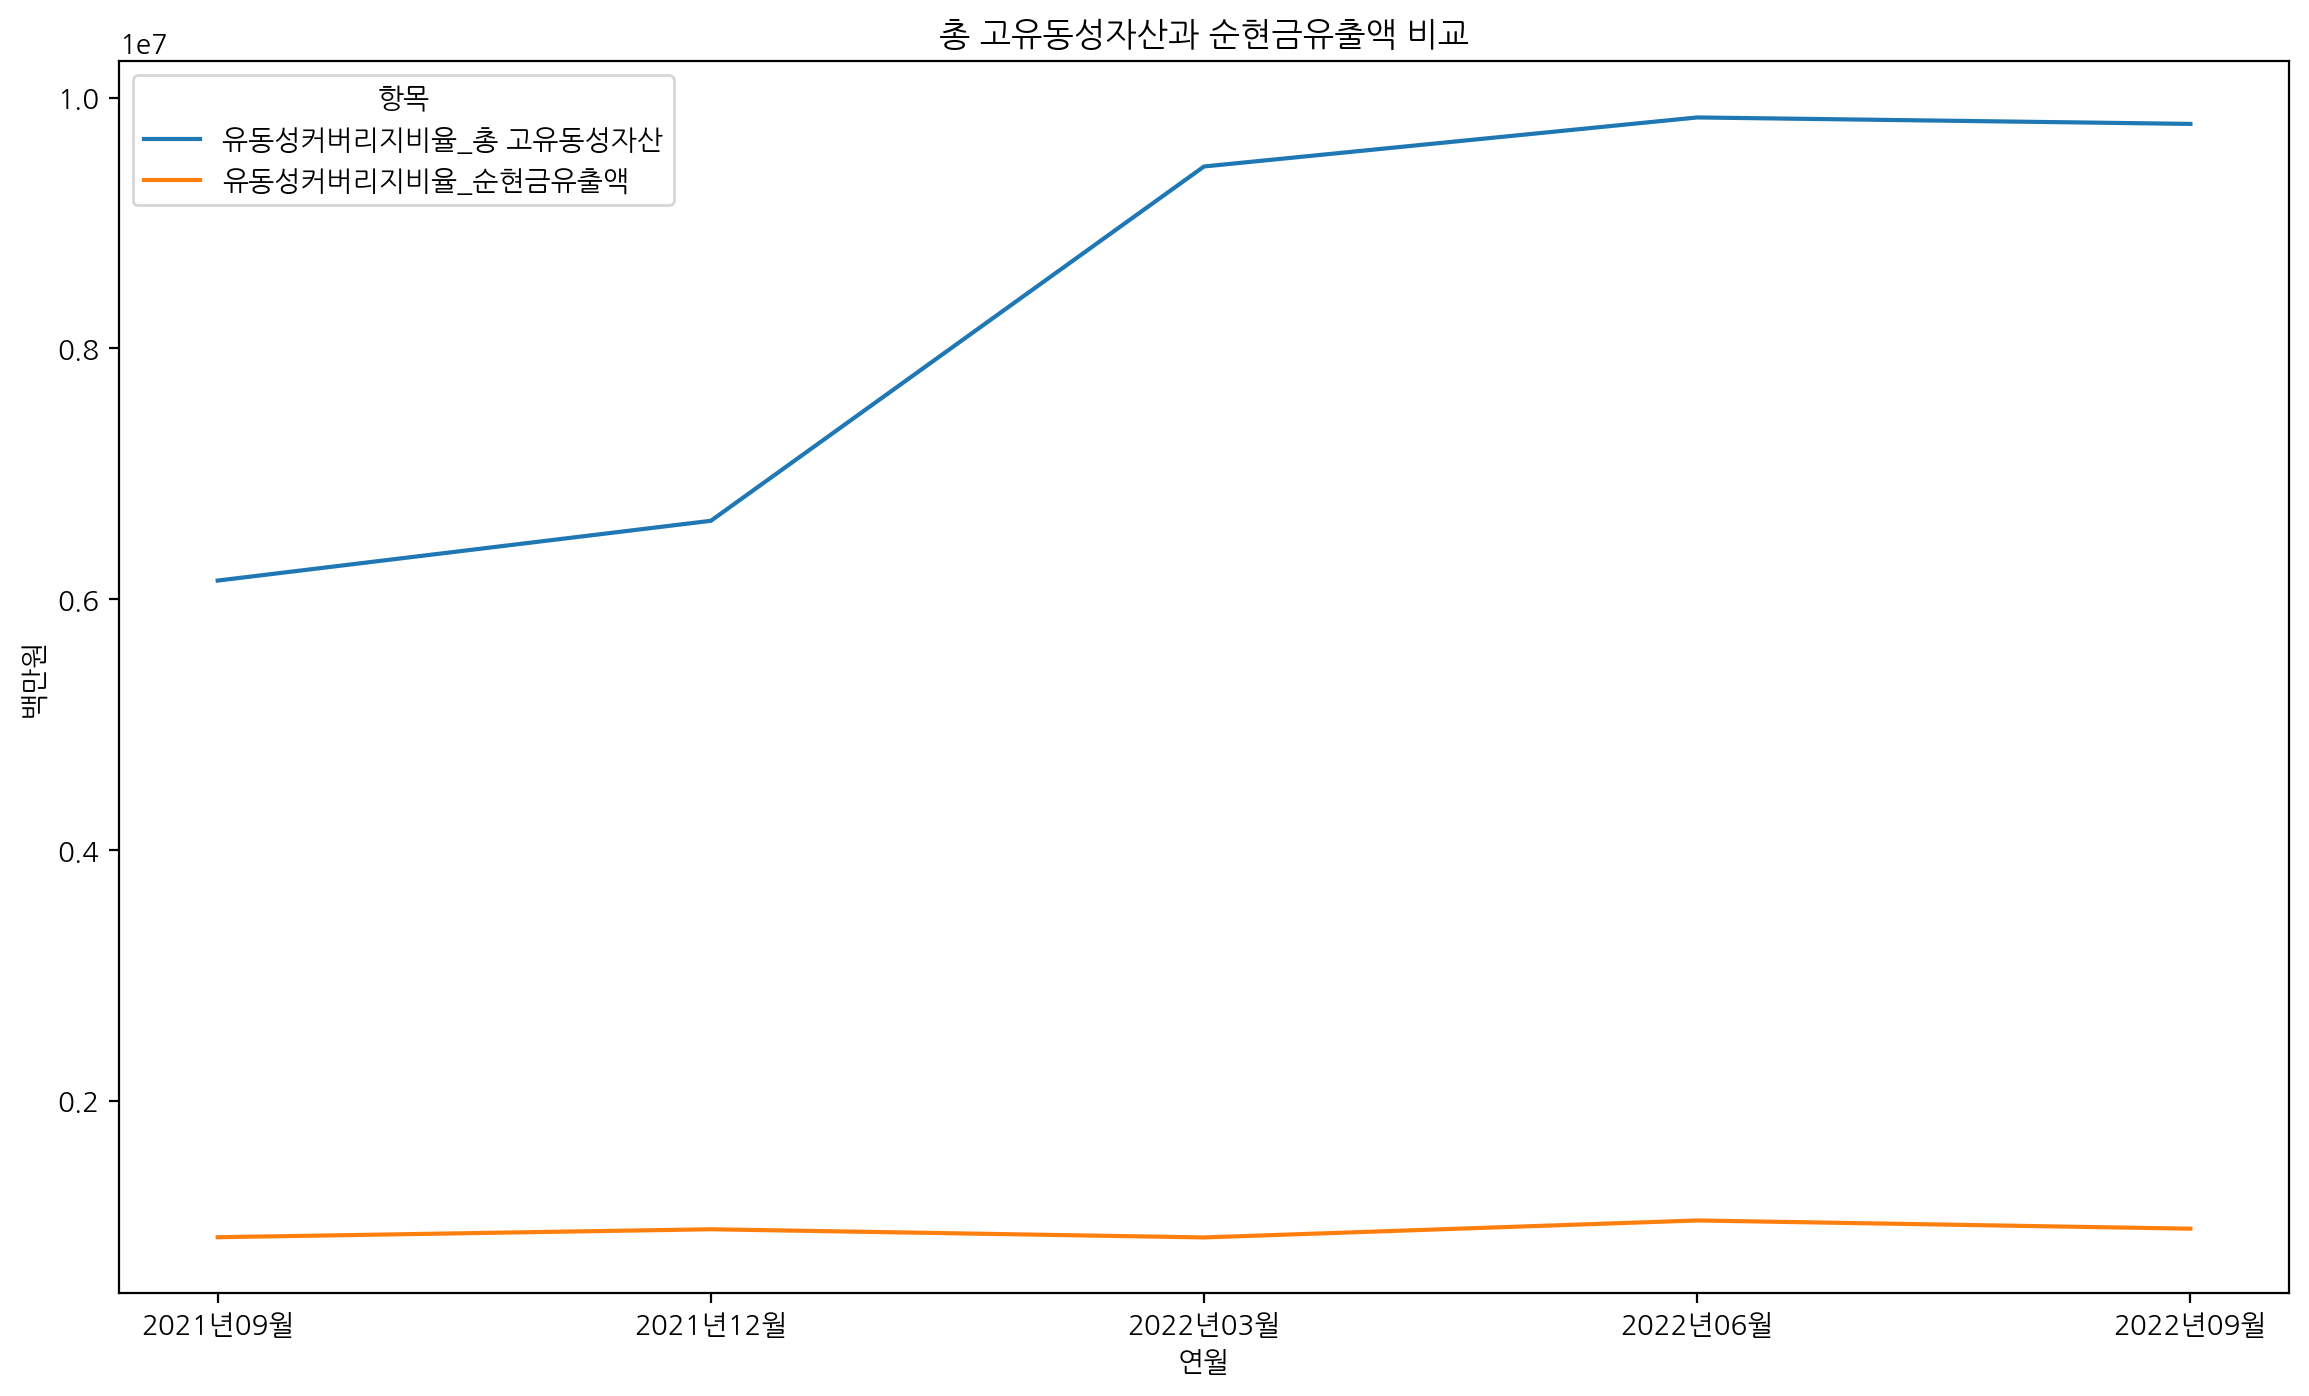

In [40]:
자산_유출액_af2021 = sns.lineplot(data = 총고유동성자산_순현금유출액_af2021, x = '연월', y = '백만원', hue = '항목')
자산_유출액_af2021 .figure.set_size_inches(14, 8)
# plt.xticks(rotation=45)
plt.title('총 고유동성자산과 순현금유출액 비교');

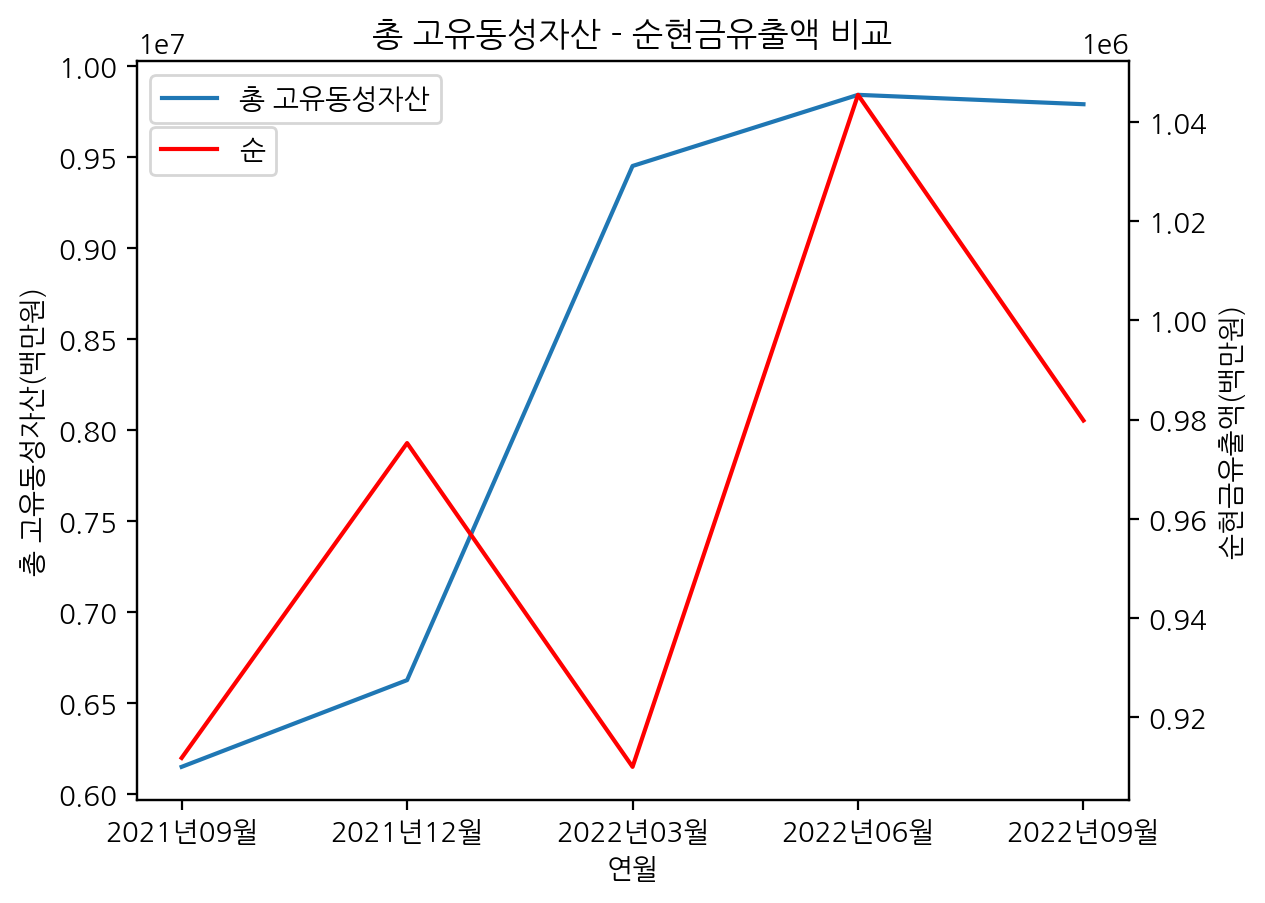

In [41]:
총고자_af2021 = df[(df['항목'] == '유동성커버리지비율_총 고유동성자산')&(df['연월']>='2021년09월')]
순현유_af2021 = df[(df['항목'] == '유동성커버리지비율_순현금유출액')&(df['연월']>='2021년09월')]

하나 = sns.lineplot(data = 총고자_af2021.rename(columns = {'백만원':'총 고유동성자산(백만원)'}), x = '연월', y = '총 고유동성자산(백만원)', label = '총 고유동성자산' ).twinx()
둘 = sns.lineplot(data = 순현유_af2021, x = '연월', y = '백만원' , color = 'red')
plt.ylabel('순현금유출액(백만원)')
plt.title('총 고유동성자산 - 순현금유출액 비교')
# plt.legend('순현금유출액')
plt.legend('순현금유출액',bbox_to_anchor = (-0.095,0.68,0.25,0.25))

In [42]:
df

,회사명,항목,연월,백만원
0,주식회사 카카오뱅크,업무용고정자산비율,2017년03월,NaN
1,주식회사 카카오뱅크,업무용고정자산비율_업무용고정자산,2017년03월,NaN
2,주식회사 카카오뱅크,업무용고정자산비율_자기자본,2017년03월,NaN
3,주식회사 카카오뱅크,유동성커버리지비율,2017년03월,NaN
4,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2017년03월,NaN
...,...,...,...,...
202,주식회사 카카오뱅크,유동성커버리지비율_총 고유동성자산,2022년09월,9789467
203,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2022년09월,979815
204,주식회사 카카오뱅크,순안정자금조달비율,2022년09월,192.97
205,주식회사 카카오뱅크,순안정자금조달비율_안정자금가용금액,2022년09월,37425487


<AxesSubplot:xlabel='연월', ylabel='%'>

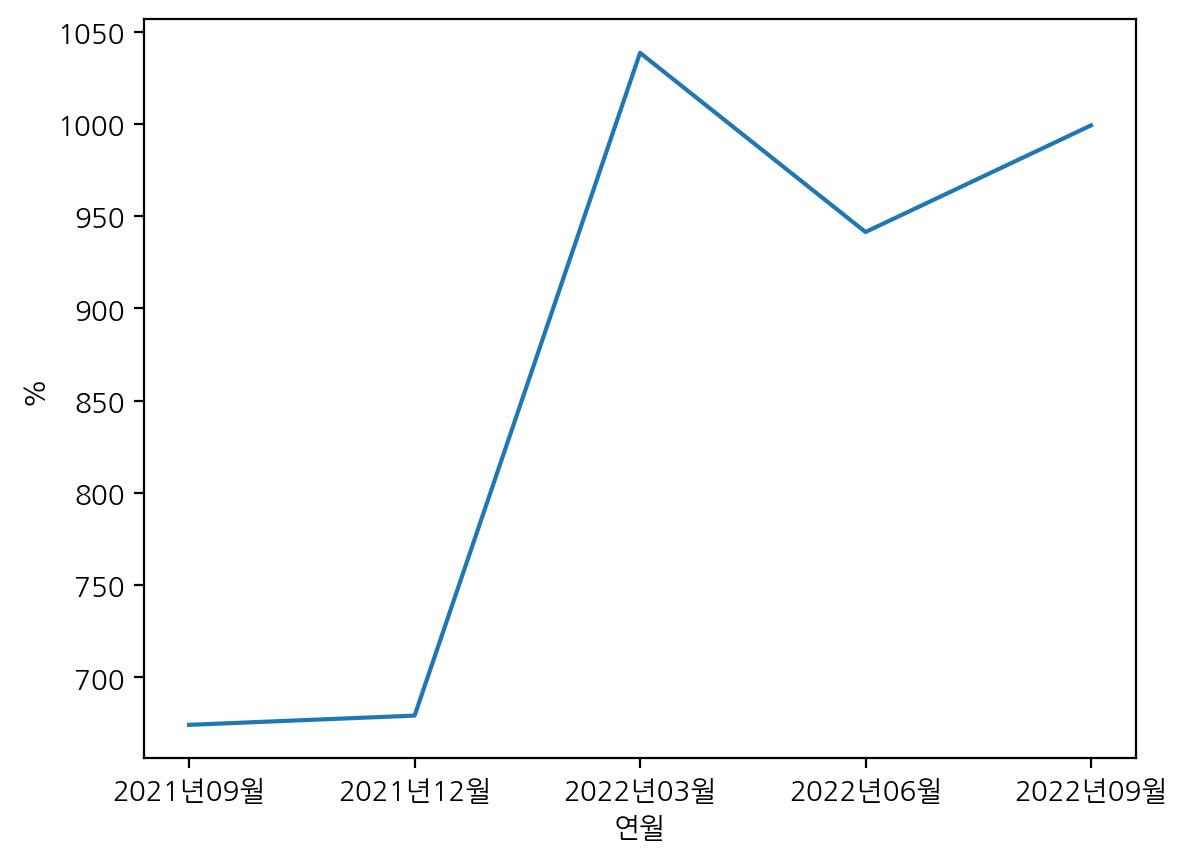

In [43]:
sns.lineplot(data = 유동성커버리지비율_af2021, x = '연월', y = '%')


##### 안정자금가용금액 과 순현금유출액 비교

In [44]:
안정자금가용금액_순현금유출액_af2021 = df[((df['항목'] == '순안정자금조달비율_안정자금가용금액')|(df['항목'] == '유동성커버리지비율_순현금유출액')) & (df['연월'] >= '2021년09월')].reset_index(drop = True)
안정자금가용금액_순현금유출액_af2021

,회사명,항목,연월,백만원
0,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2021년09월,911820
1,주식회사 카카오뱅크,순안정자금조달비율_안정자금가용금액,2021년09월,32152346
2,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2021년12월,975264
3,주식회사 카카오뱅크,순안정자금조달비율_안정자금가용금액,2021년12월,33118942
4,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2022년03월,910024
5,주식회사 카카오뱅크,순안정자금조달비율_안정자금가용금액,2022년03월,35917746
6,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2022년06월,1045429
7,주식회사 카카오뱅크,순안정자금조달비율_안정자금가용금액,2022년06월,36085633
8,주식회사 카카오뱅크,유동성커버리지비율_순현금유출액,2022년09월,979815
9,주식회사 카카오뱅크,순안정자금조달비율_안정자금가용금액,2022년09월,37425487


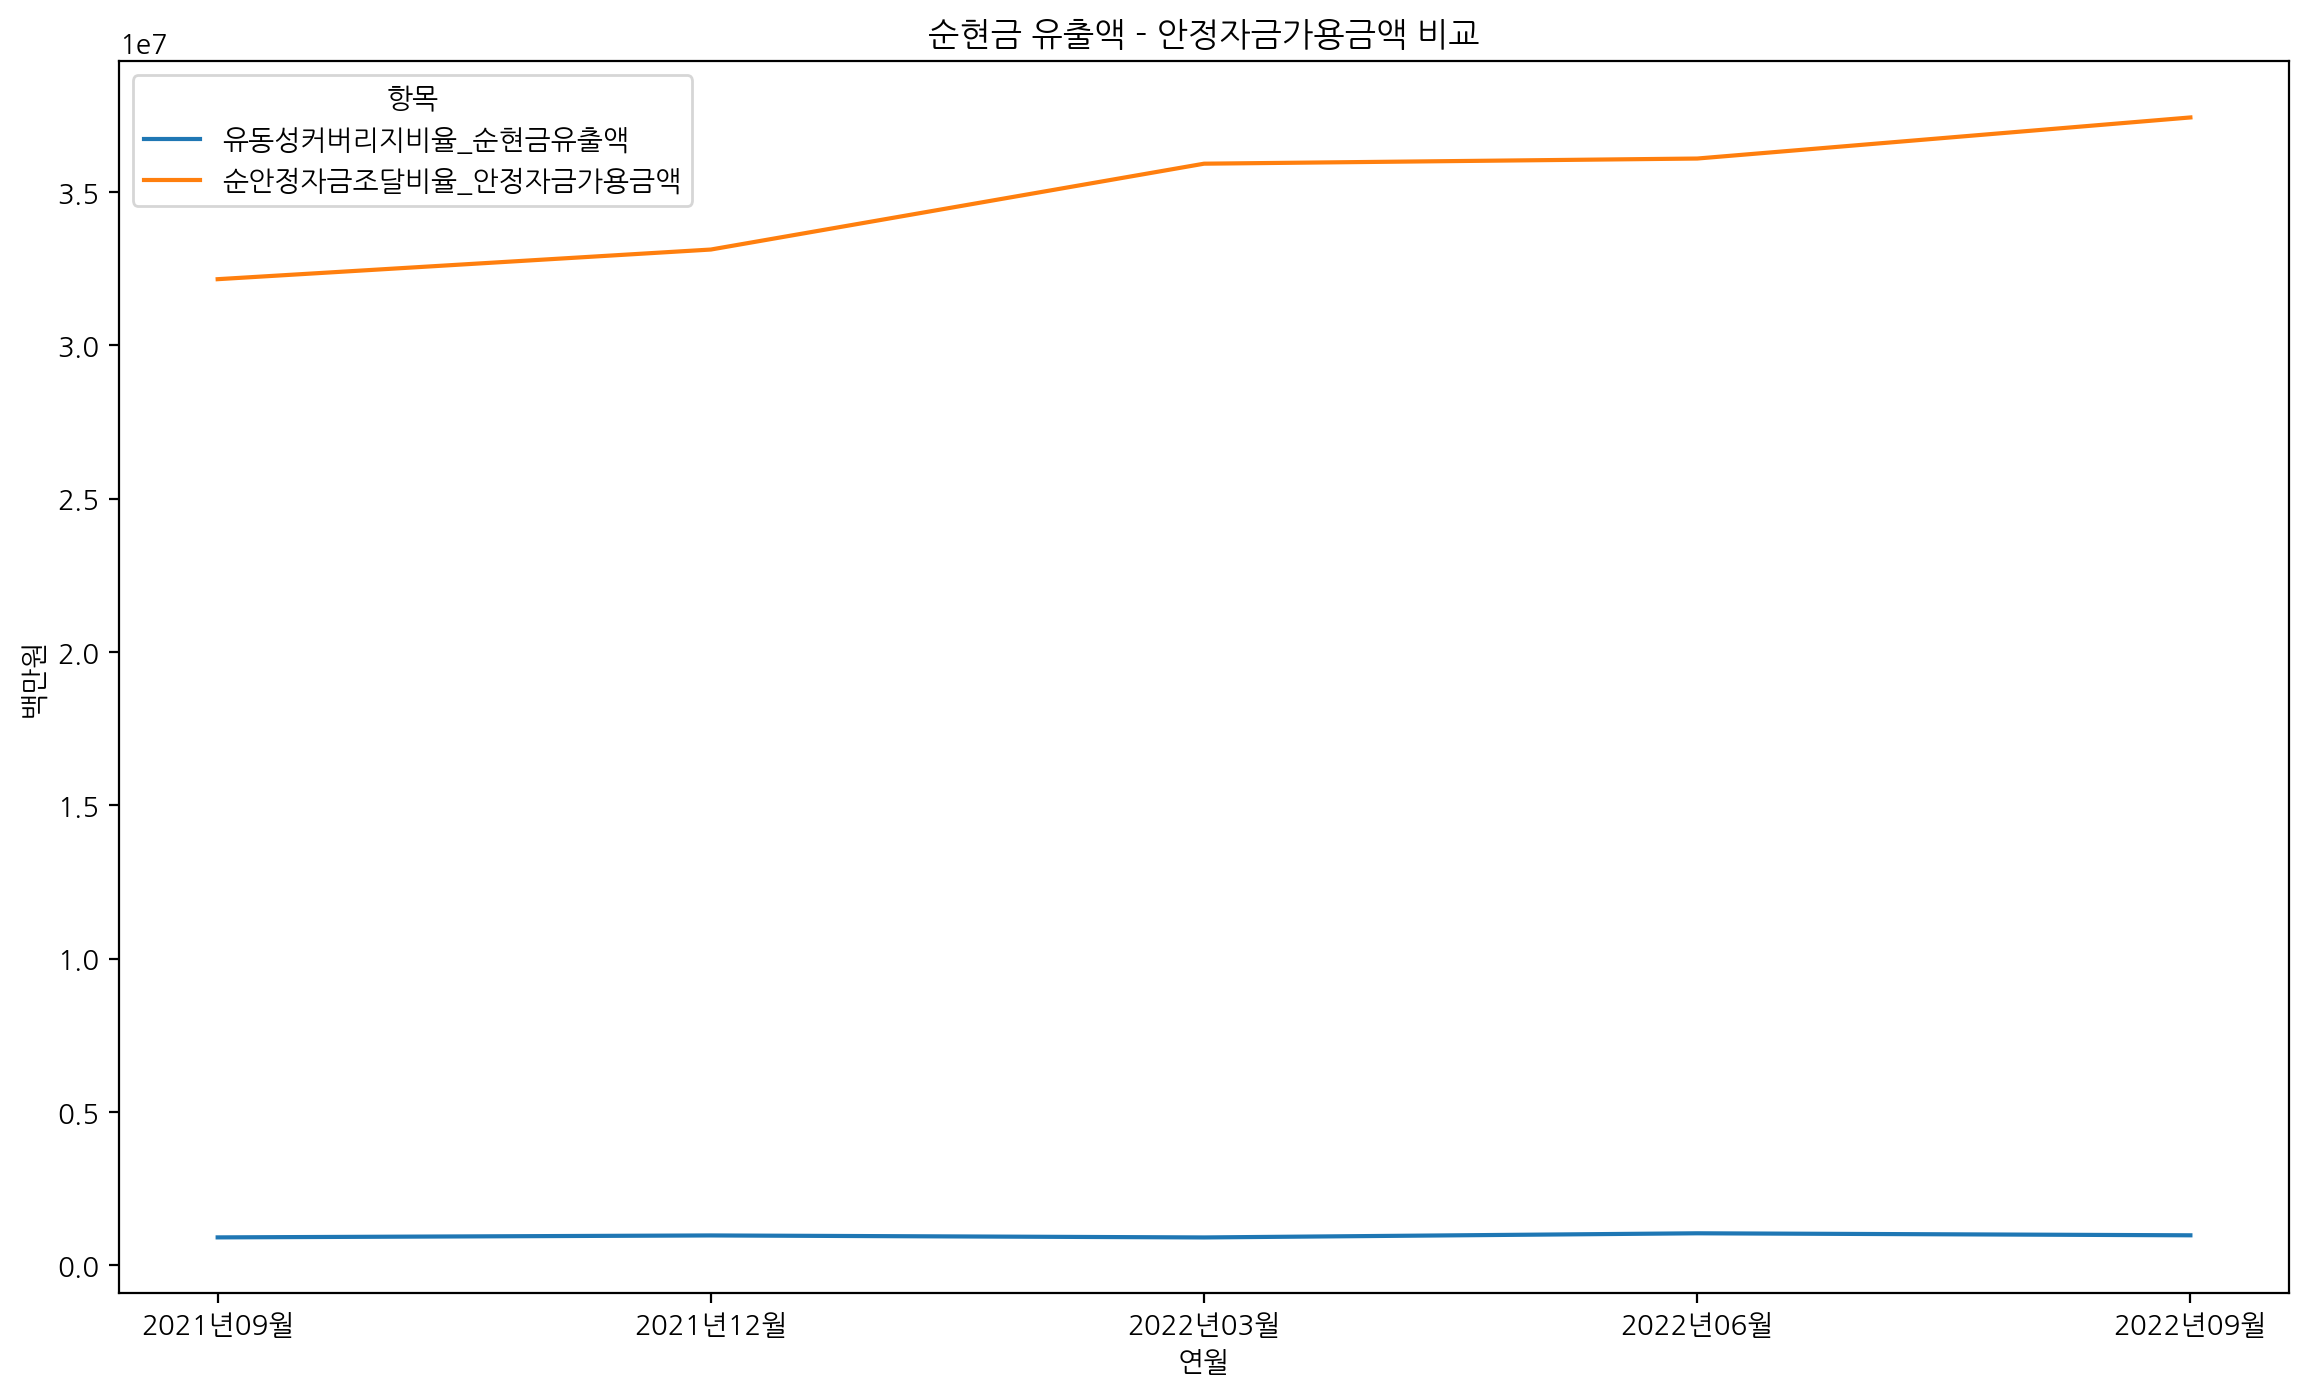

In [45]:
가용금액_유출액_af2021 = sns.lineplot(data = 안정자금가용금액_순현금유출액_af2021, x = '연월', y = '백만원', hue = '항목')
가용금액_유출액_af2021.figure.set_size_inches(14, 8)
# plt.xticks(rotation=45)
plt.title('순현금 유출액 - 안정자금가용금액 비교');

##### 순안정자금조달비율 시각화

In [46]:
순안정자금조달비율[순안정자금조달비율['연월'] >= '2021년09월']

,회사명,항목,연월,%
18,주식회사 카카오뱅크,순안정자금조달비율,2021년09월,178.78
19,주식회사 카카오뱅크,순안정자금조달비율,2021년12월,184.85
20,주식회사 카카오뱅크,순안정자금조달비율,2022년03월,194.64
21,주식회사 카카오뱅크,순안정자금조달비율,2022년06월,197.58
22,주식회사 카카오뱅크,순안정자금조달비율,2022년09월,192.97


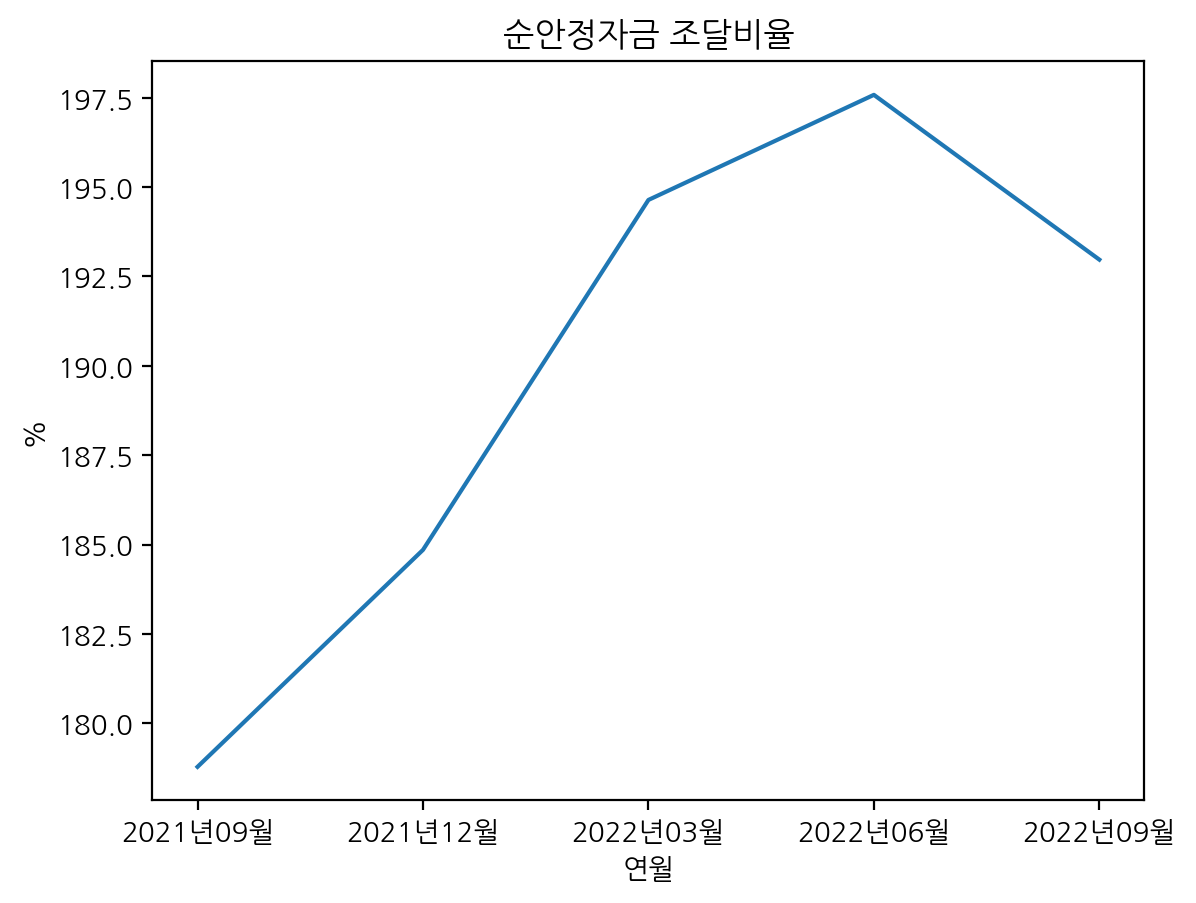

In [47]:
sns.lineplot(data = 순안정자금조달비율[순안정자금조달비율['연월'] >= '2021년09월'], x = '연월', y = '%')
# plt.xticks(rotation=45)
plt.title('순안정자금 조달비율');

##### 연체율 시각화 (보류)

In [48]:
df관련연체율 = 연체율_base[(((연체율_base['항목'] == '기업대출_연체율'))|(연체율_base['항목'] == '기업대출_대기업대출_연체율')|(연체율_base['항목'] == '기업대출_중소기업대출_연체율'))&(연체율_base['연월'] >= '2021년09월')]
df관련연체율

,회사명,항목,연월,%
128,주식회사 카카오뱅크,기업대출_연체율,2021년09월,0
129,주식회사 카카오뱅크,기업대출_대기업대출_연체율,2021년09월,0
130,주식회사 카카오뱅크,기업대출_중소기업대출_연체율,2021년09월,0
135,주식회사 카카오뱅크,기업대출_연체율,2021년12월,0
136,주식회사 카카오뱅크,기업대출_대기업대출_연체율,2021년12월,0
137,주식회사 카카오뱅크,기업대출_중소기업대출_연체율,2021년12월,0
142,주식회사 카카오뱅크,기업대출_연체율,2022년03월,0
143,주식회사 카카오뱅크,기업대출_대기업대출_연체율,2022년03월,0
144,주식회사 카카오뱅크,기업대출_중소기업대출_연체율,2022년03월,0
149,주식회사 카카오뱅크,기업대출_연체율,2022년06월,0


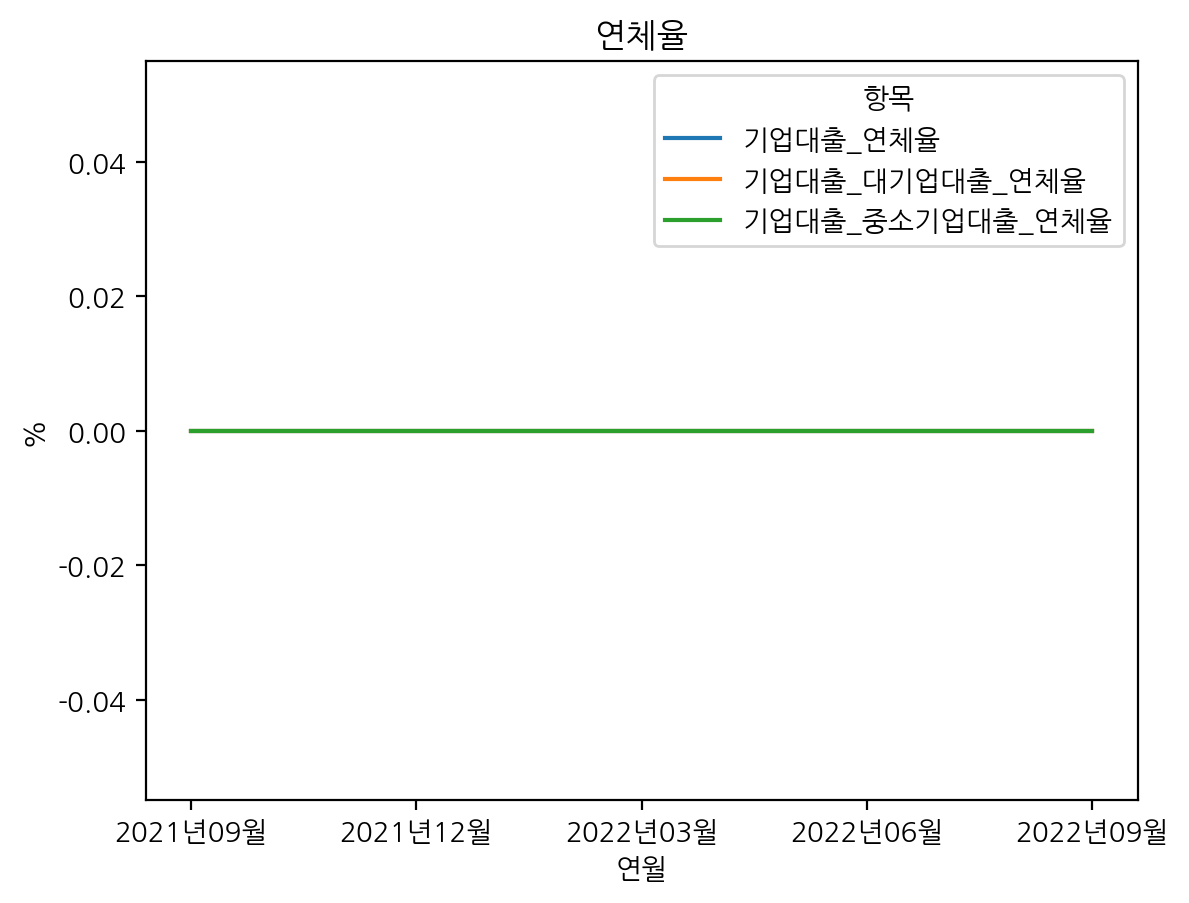

In [49]:
sns.lineplot(data = df관련연체율, x = '연월', y = '%', hue = '항목')
plt.title('연체율');
# plt.xticks(rotation=45);

##### 대손충당금적립비율_고정이하여신대비

In [50]:
대손충당금적립비율_고정이하여신대비[대손충당금적립비율_고정이하여신대비['연월'] >= '2021년09월']

,회사명,항목,연월,%
683,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2021년09월,228.41
719,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2021년12월,242.58
755,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2022년03월,247.73
791,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2022년06월,276.39
827,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2022년09월,272.83


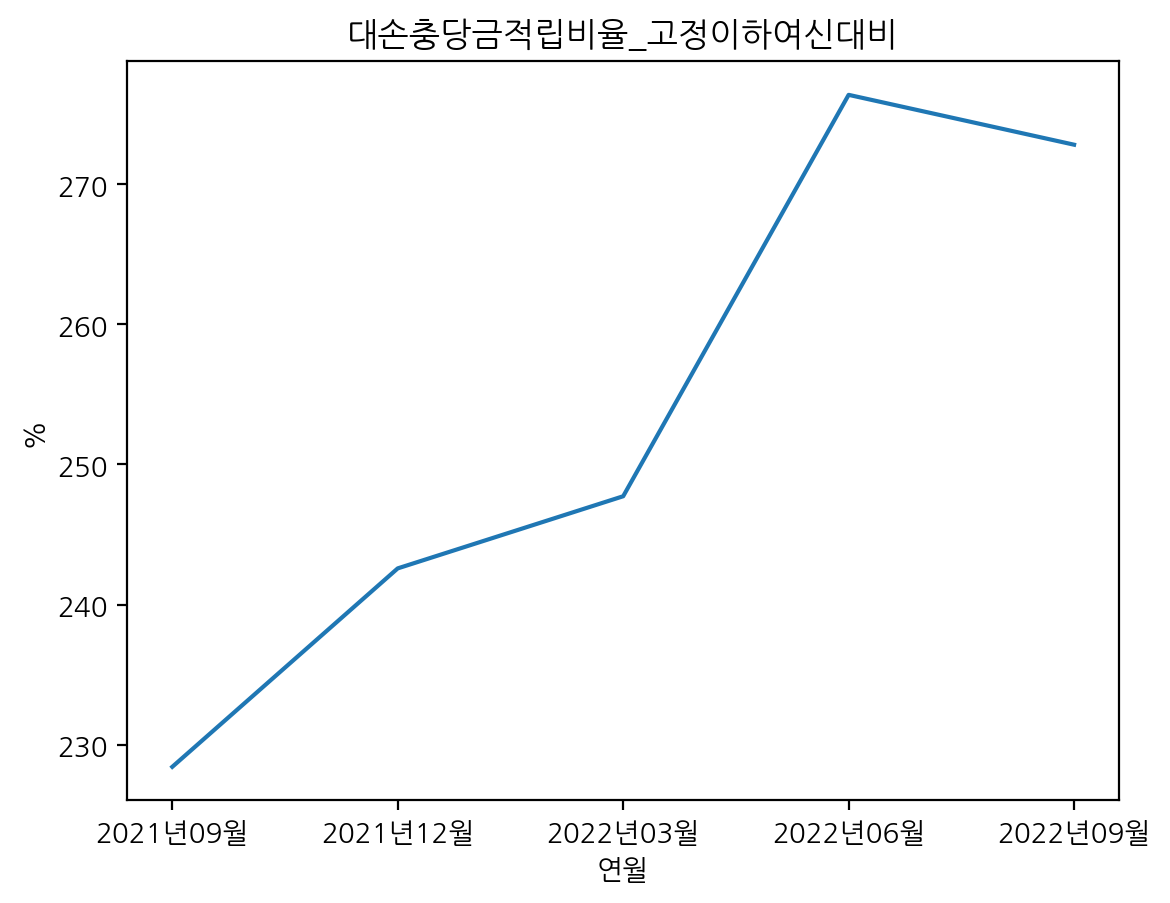

In [51]:
sns.lineplot(data = 대손충당금적립비율_고정이하여신대비[대손충당금적립비율_고정이하여신대비['연월'] >= '2021년09월'], x = '연월', y = '%')
plt.title('대손충당금적립비율_고정이하여신대비');
# plt.xticks(rotation=45);

##### 고정이하여신비율

* 모든 고정이하여신비율

In [52]:
고정이하여신비율[고정이하여신비율['연월'] >= '2021년09월']

,회사명,항목,연월,%
669,주식회사 카카오뱅크,고정이하여신비율,2021년09월,0.21
705,주식회사 카카오뱅크,고정이하여신비율,2021년12월,0.22
741,주식회사 카카오뱅크,고정이하여신비율,2022년03월,0.25
777,주식회사 카카오뱅크,고정이하여신비율,2022년06월,0.27
813,주식회사 카카오뱅크,고정이하여신비율,2022년09월,0.29


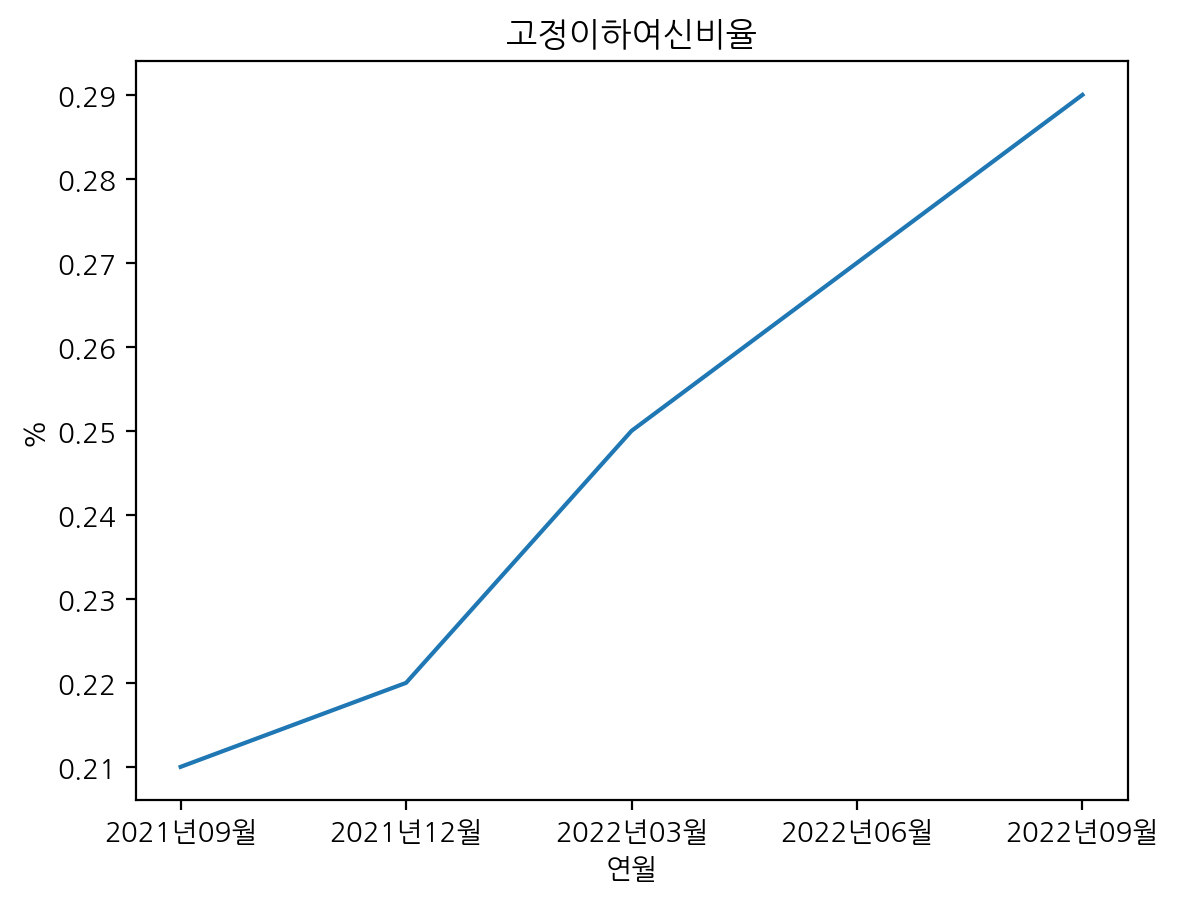

In [53]:
sns.lineplot(data = 고정이하여신비율[고정이하여신비율['연월'] >= '2021년09월'], x = '연월', y = '%')
plt.title('고정이하여신비율');
# plt.xticks(rotation=45);

* 고정이하여신비율 중소기업과 대기업 나누어서 분석

In [54]:
고정이하여신_대_중소기업_af2021 = 여신건전성_base[((여신건전성_base['항목'] == '기업여신_대기업:고정이하여신')|(여신건전성_base['항목'] == '기업여신_중소기업:고정이하여신'))&(여신건전성_base['연월']>='2021년09월')]
고정이하여신_대_중소기업_af2021

,회사명,항목,연월,%
677,주식회사 카카오뱅크,기업여신_대기업:고정이하여신,2021년09월,0.0
678,주식회사 카카오뱅크,기업여신_중소기업:고정이하여신,2021년09월,0.0
713,주식회사 카카오뱅크,기업여신_대기업:고정이하여신,2021년12월,0.0
714,주식회사 카카오뱅크,기업여신_중소기업:고정이하여신,2021년12월,0.0
749,주식회사 카카오뱅크,기업여신_대기업:고정이하여신,2022년03월,0.0
750,주식회사 카카오뱅크,기업여신_중소기업:고정이하여신,2022년03월,0.0
785,주식회사 카카오뱅크,기업여신_대기업:고정이하여신,2022년06월,0.0
786,주식회사 카카오뱅크,기업여신_중소기업:고정이하여신,2022년06월,0.0
821,주식회사 카카오뱅크,기업여신_대기업:고정이하여신,2022년09월,0.0
822,주식회사 카카오뱅크,기업여신_중소기업:고정이하여신,2022년09월,0.0


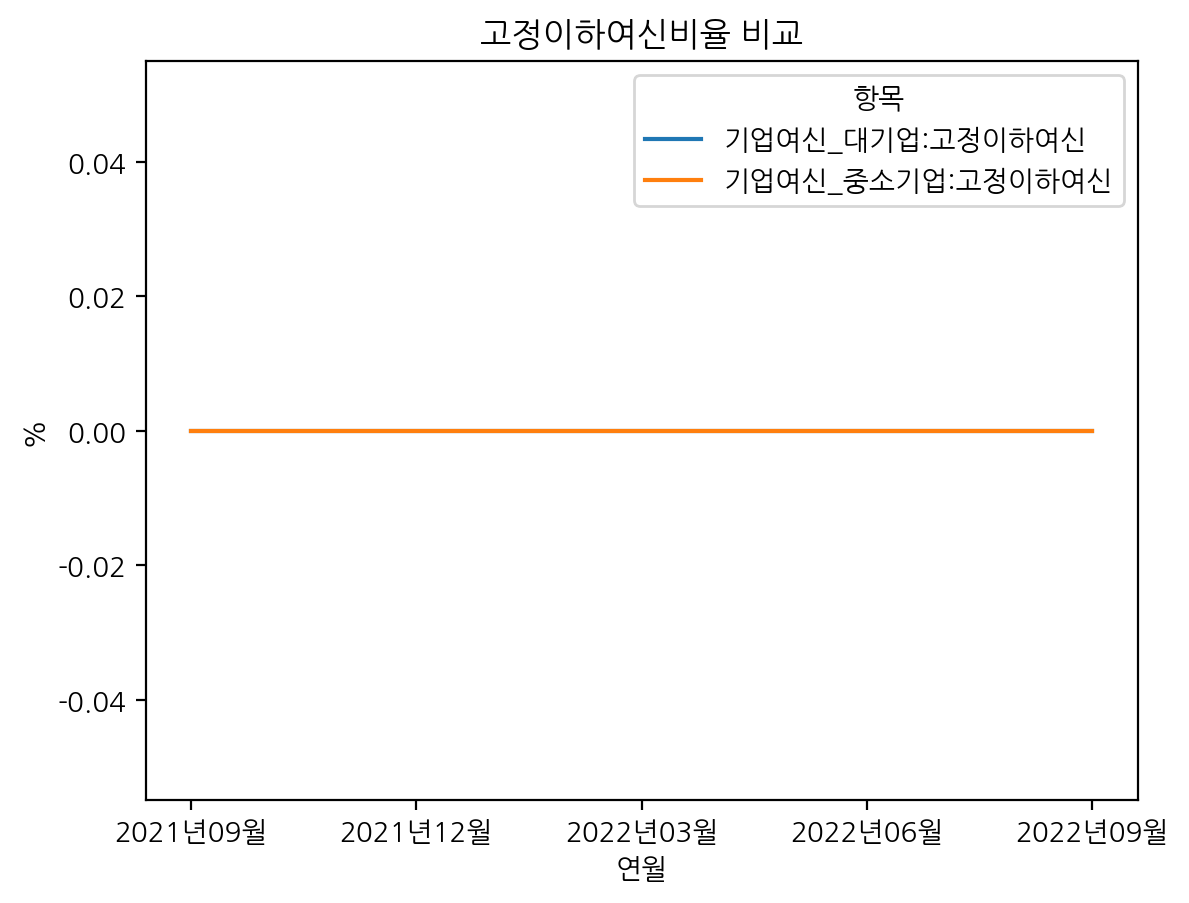

In [55]:
sns.lineplot(data = 고정이하여신_대_중소기업_af2021, x = '연월', y = '%', hue = '항목')
# plt.xticks(rotation = 45)
plt.title('고정이하여신비율 비교');

#### 필요한 데이터만 추출해서 통합하기

In [56]:
liquidity_1 = pd.read_excel('data/FISIS_유동성데이터_201703-202209.xls', header = 1)
cols__ = liquidity_1.T.iloc[4]
liquidity_1 = liquidity_1.T
liquidity_1.columns = cols__
first = liquidity_1.iloc[7:,:][['유동성커버리지비율', '순안정자금조달비율']]

In [57]:
delay_ratio = pd.read_excel('data/FISIS_연체율_201703-202209.xls', header = 1).T
cols___ = delay_ratio.iloc[4]
delay_ratio.columns = cols___
second = delay_ratio.iloc[7:,:][['총대출채권_연체율', '기업대출_대기업대출_연체율', '기업대출_중소기업대출_연체율']]

In [58]:
soundness = pd.read_excel('data/FISIS_여신건전성_201703-202209.xls', header = 1).T
cols____ = soundness.iloc[4]
soundness.columns = cols____
third = soundness.iloc[7:,:][['대손충당금적립비율(총여신대비)', '고정이하여신비율']]

In [59]:
file_name = "kakao_dataset.csv"
bo_dataset = pd.concat([first, second, third], axis = 1)
bo_dataset.to_csv(file_name, index = False)

##### kakao 데이터 셋 : 준호님 데이터를 기준으로 데이터프레임 맞추기

In [60]:
bo_dataset.shape

(23, 7)

In [61]:
# # sns.lineplot(data = bo_dataset, x = bo_dataset.index, y = bo_dataset.columns)
# sns.lineplot(data = bo_dataset, )

#### 추가 시각화

In [62]:
고정이하여신_대_중소기업_af2021
대손충당금적립비율_고정이하여신대비_af2021 = 대손충당금적립비율_고정이하여신대비[대손충당금적립비율_고정이하여신대비['연월'] >= '2021년09월']
# pd.concat([고정이하여신_대_중소기업_af2021,대손충당금적립비율_고정이하여신대비_af2021 ])
# sns.lineplot(data = )
대손충당금적립비율_고정이하여신대비_af2021

,회사명,항목,연월,%
683,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2021년09월,228.41
719,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2021년12월,242.58
755,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2022년03월,247.73
791,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2022년06월,276.39
827,주식회사 카카오뱅크,대손충당금적립비율(고정이하여신대비),2022년09월,272.83


##### 대손충당금적립비(총여신대비/ 고정이하여신대비) - 고정이하여신비

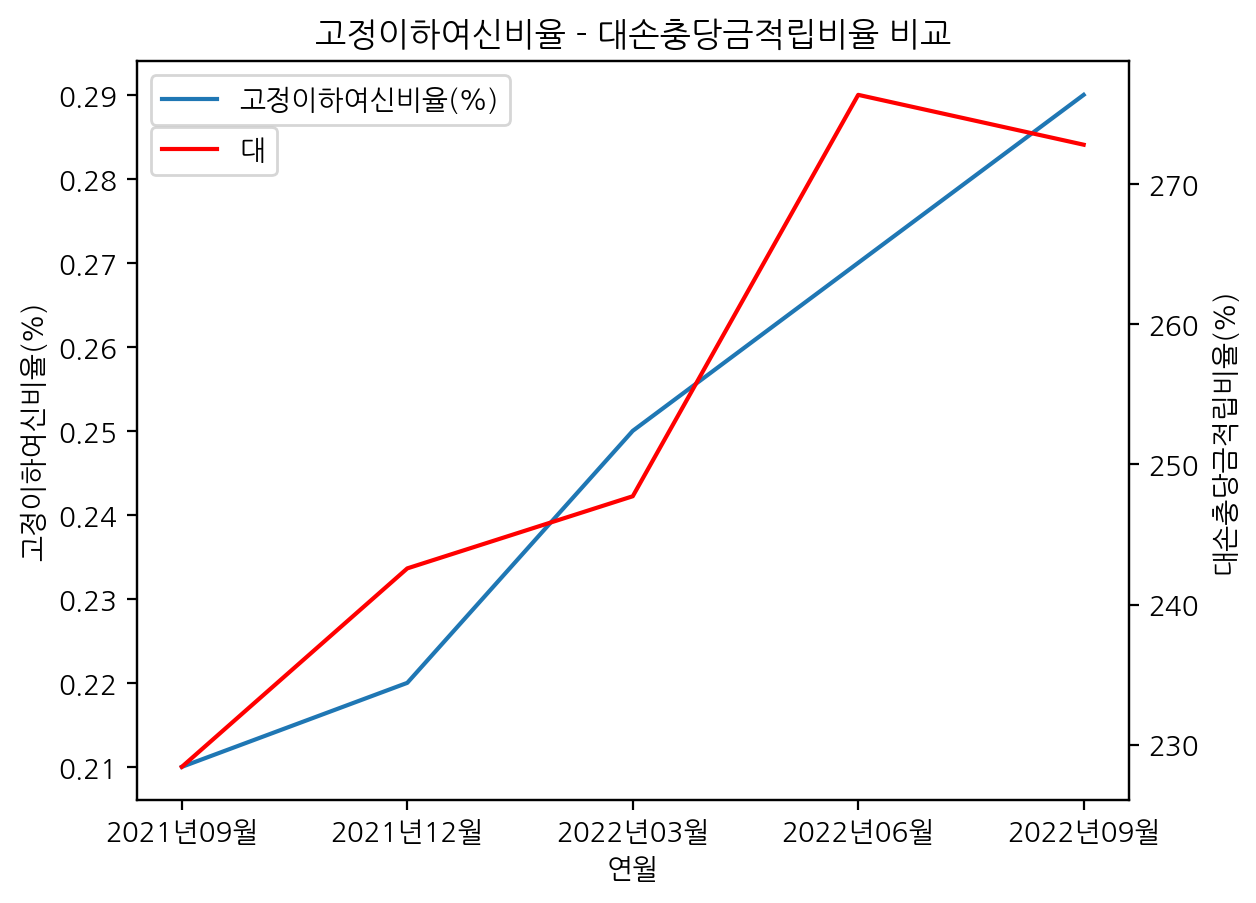

In [63]:
# sns.lineplot(data = pd.concat([고정이하여신비율_af2021,대손충당금적립비율_고정이하여신대비_af2021]), x = '연월', y = '%', hue = '항목')
aa = sns.lineplot(data = 고정이하여신비율_af2021.rename(columns = {'%':'고정이하여신비율(%)'}), x = '연월', y = '고정이하여신비율(%)' , label = '고정이하여신비율(%)').twinx()
bb = sns.lineplot(data = 대손충당금적립비율_고정이하여신대비_af2021, x = '연월', y = '%' , color = 'red')
plt.legend('대손충당금적립비율', bbox_to_anchor = (-0.095, 0.68, 0.25, 0.25))
plt.ylabel('대손충당금적립비율(%)')
plt.title('고정이하여신비율 - 대손충당금적립비율 비교');

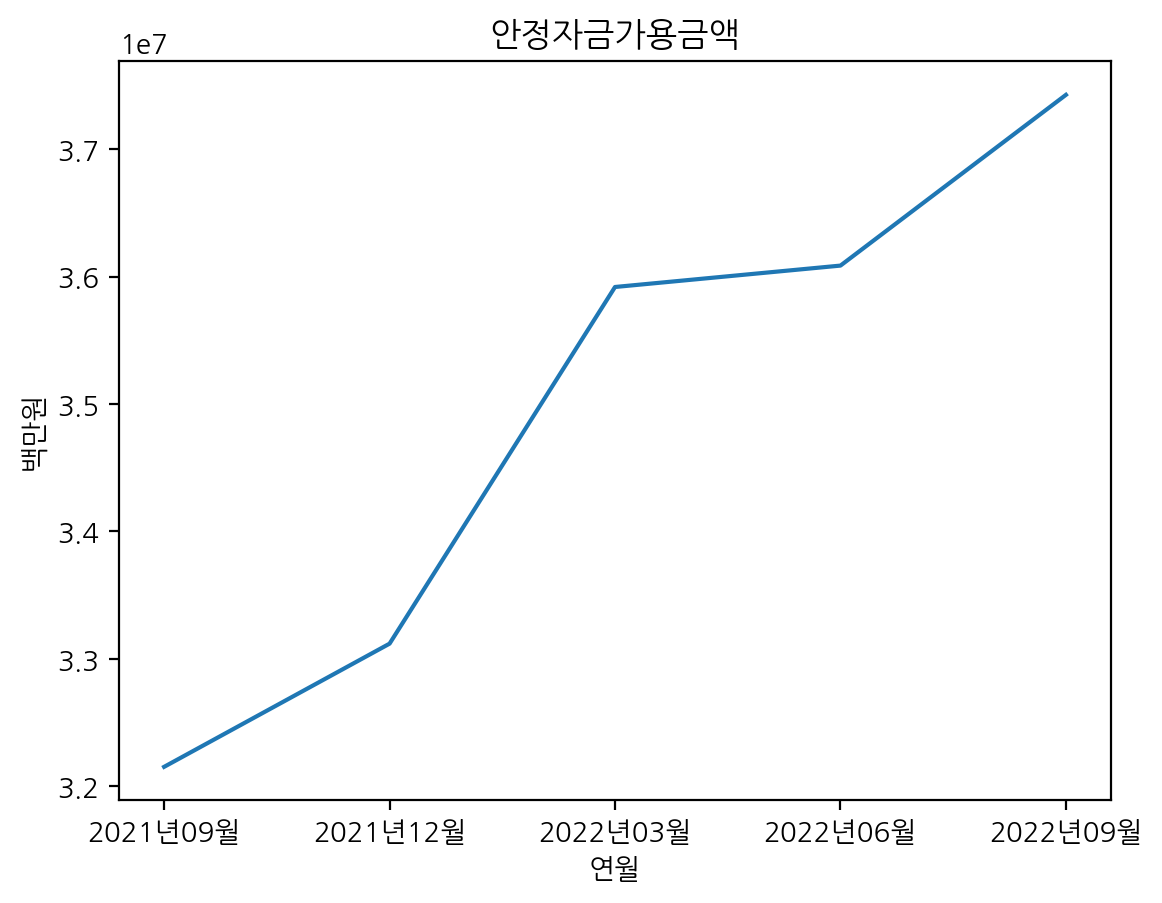

In [64]:
sns.lineplot(data = df[(df['항목'] == '순안정자금조달비율_안정자금가용금액')&(df['연월']>='2021년09월')], x = '연월', y = '백만원')
plt.title('안정자금가용금액');

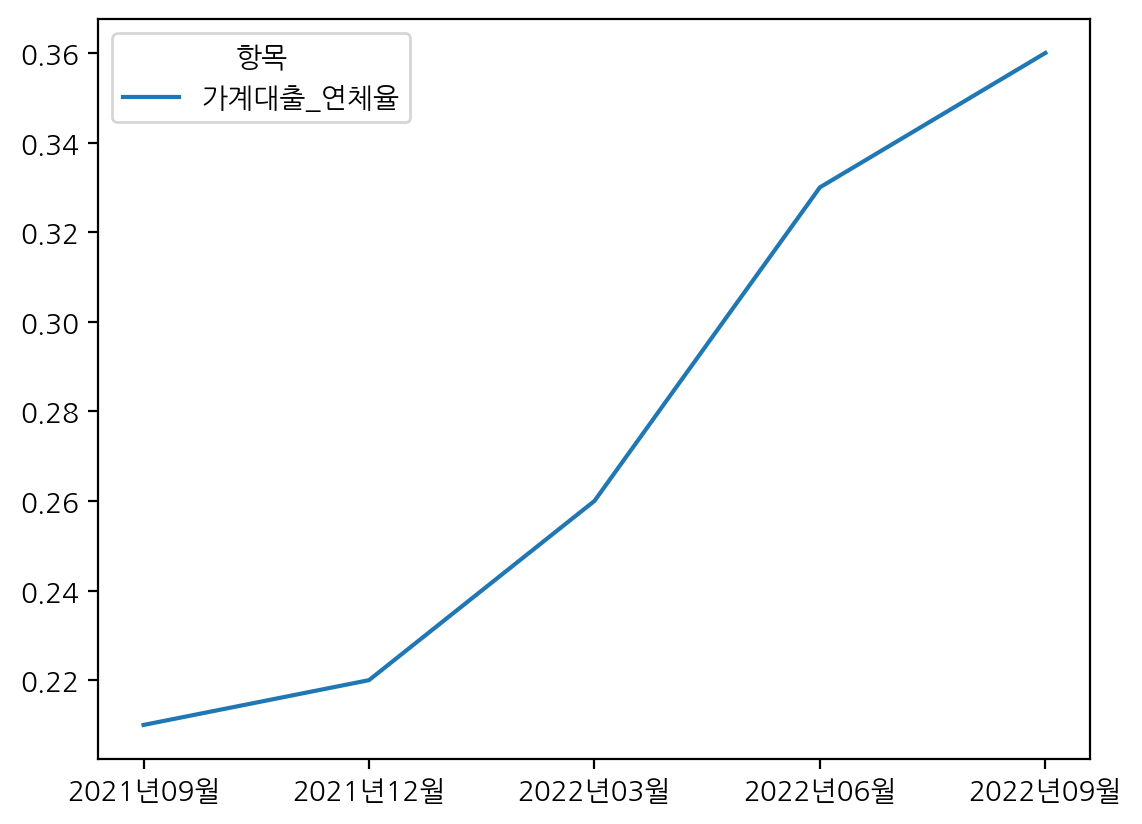

In [65]:
가계대출_연체율 = pd.read_excel('data/FISIS_가계대출_연체율_202109-202209.xls', header = 1).T
가계대출_연체율.columns = 가계대출_연체율.iloc[4]
가계대출_연체율 = 가계대출_연체율.iloc[7:,:]
sns.lineplot(data = 가계대출_연체율);

In [66]:
순안정자금_유동성커버리지_af2021

,회사명,항목,연월,%
0,주식회사 카카오뱅크,유동성커버리지비율,2021년09월,674.25
1,주식회사 카카오뱅크,순안정자금조달비율,2021년09월,178.78
2,주식회사 카카오뱅크,유동성커버리지비율,2021년12월,679.26
3,주식회사 카카오뱅크,순안정자금조달비율,2021년12월,184.85
4,주식회사 카카오뱅크,유동성커버리지비율,2022년03월,1038.44
5,주식회사 카카오뱅크,순안정자금조달비율,2022년03월,194.64
6,주식회사 카카오뱅크,유동성커버리지비율,2022년06월,941.34
7,주식회사 카카오뱅크,순안정자금조달비율,2022년06월,197.58
8,주식회사 카카오뱅크,유동성커버리지비율,2022년09월,999.11
9,주식회사 카카오뱅크,순안정자금조달비율,2022년09월,192.97


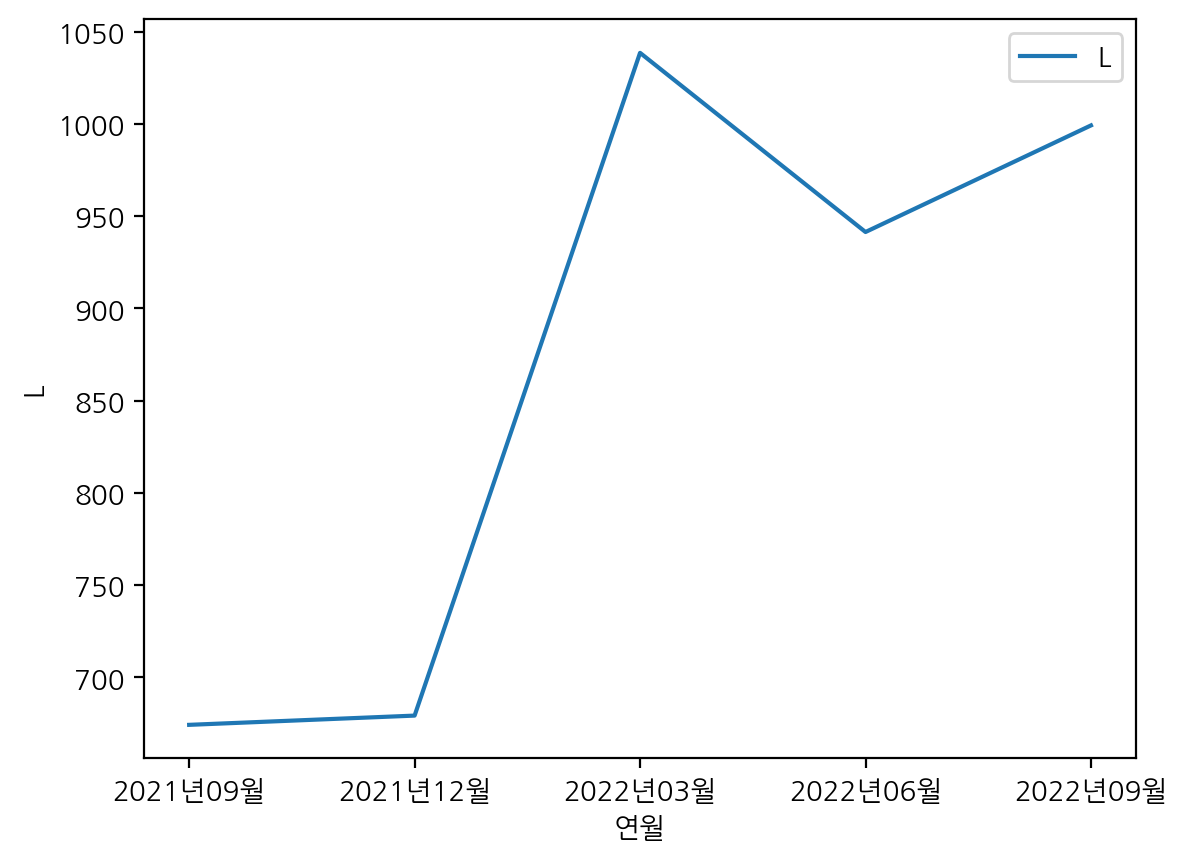

In [67]:
LCR_af2021 = 순안정자금_유동성커버리지_af2021[순안정자금_유동성커버리지_af2021['항목'] == '유동성커버리지비율']
NSFR_af2021 = 순안정자금_유동성커버리지_af2021[순안정자금_유동성커버리지_af2021['항목'] == '순안정자금조달비율']
일 = sns.lineplot(data = LCR_af2021.rename(columns = {'%':'L'}), x = '연월', y = 'L' , label = 'L' )
# .twinx()
# 이 = sns.lineplot(data = NSFR_af2021, x = '연월', y = '%' , color = 'red')
# plt.legend('N(%)', bbox_to_anchor = (-0.095, 0.68, 0.25, 0.25))
# plt.ylabel('N(%)')
# plt.title('LCR - NSFR 비교');